###  `Problem Statement`

- Finance/Lending company needs to take **decision** for loan approval based on the applicant’s profile.
-  Decision is :
    -  `If the applicant is likely to repay the loan,`
    -   `If the applicant is not likely to repay the loan :  i.e. he/she is likely to default.`
- The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not.
-  When Loan accepted: there are **3 possible scenarios** can come :`
   - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
   - **Current**: Applicant is in the process of paying the instalments, 
       i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
   - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has 
   **DEFAULTED** on the loan 
- Borrowers who default cause the largest amount of loss to the lenders.
- The Idea is To identify patterns which indicate if a person is likely to default.**
- Which may be used for taking actions :
    - such as denying  the loan, 
    - reducing the amount of loan, 
    - lending (to risky applicants) at a higher interest rate, etc.

###  `Goal `
- To identify **patterns** which indicate if a person is likely to **default.**
- The company wants to understand the **driving factors** behind loan default.
- Identify the **Driver variables** which are strong indicators of default.

### `Load all required Libraries`

In [945]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500,'display.max_columns', 500,'display.width', 1000)


In [946]:
#Get the data
lend  = pd.read_csv("loan.csv",encoding="UTF-8")
lend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [947]:
#Read the Meta Data file too.
metadata = pd.read_excel("Data_Dictionary.xlsx")
metadata

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


##  <span style='background :cyan' > Findings:- </span>
- `We have 39717 rows.`
- `111 columns.`

In [948]:
lend.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [949]:
#check missing value percentages 
#round the percentages to 2 decimal points.
missing_columns = round((lend.isna().sum()/len(lend))*100,2)
print(missing_columns.sort_values(ascending=False))
missing_columns

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

##  <span style='background :cyan' > Findings:- </span>
- ` Many columns have 100% null values.`
- ` We will drop columns having more than 50% null values.`

In [950]:
#Create a List more than 50% null values columns
drop_columns = list(missing_columns[missing_columns>50].index)
#check columns having more than 50% null values
print(f"No of columns having more than 50% missing values:{len(drop_columns)}")
print("-----------------------------")
print(missing_columns[missing_columns>50].sort_values(ascending=False))

No of columns having more than 50% missing values:57
-----------------------------
total_il_high_credit_limit        100.00
il_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
total_bal_il                      100.00
total_bc_limit                    100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
verification_st

In [951]:
#Drop 50% missing values columns 
lend.drop(drop_columns,axis=1,inplace=True)

In [952]:
lend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

##  <span style='background :cyan' > Findings:- </span>
-` For Now, We have dropped 57 columns out of 111 coumns`.


In [953]:
missing_columns = lend.isna().sum()

In [954]:
# Check all the columns having atleast 1 missing values
print(missing_columns[missing_columns>0].index)

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'], dtype='object')


In [955]:
# All columns having atleast ONE missing value. Collect those columns
columns_miss = missing_columns[missing_columns>0].index

In [956]:
# Check the missing value columns what are those !
lend[columns_miss].head(20)

,emp_title,emp_length,desc,title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,83.70%,Jan-15,May-16,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,9.40%,Apr-13,Sep-13,0.0,0.0,0.0,0.0
2,NaN,10+ years,NaN,real estate business,98.50%,Jun-14,May-16,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,21%,Jan-15,Apr-16,0.0,0.0,0.0,0.0
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,53.90%,May-16,May-16,0.0,0.0,0.0,0.0
5,Veolia Transportaton,3 years,NaN,My wedding loan I promise to pay back,28.30%,Jan-15,Jan-16,0.0,0.0,0.0,0.0
6,Southern Star Photography,8 years,Borrower added on 12/18/11 > I am planning o...,Loan,85.60%,May-16,May-16,0.0,0.0,0.0,0.0
7,MKC Accounting,9 years,Borrower added on 12/16/11 > Downpayment for...,Car Downpayment,87.50%,Jan-15,Dec-14,0.0,0.0,0.0,0.0
8,NaN,4 years,Borrower added on 12/21/11 > I own a small h...,Expand Business & Buy Debt Portfolio,32.60%,Apr-12,Aug-12,0.0,0.0,0.0,0.0
9,Starbucks,< 1 year,Borrower added on 12/16/11 > I'm trying to b...,Building my credit history.,36.50%,Nov-12,Mar-13,0.0,0.0,0.0,0.0


##  <span style='background :cyan' > Findings:- </span>

- `Below columns have ATLEAST ONE missing values`.
- `Inspect each column indivisually`.

    - emp_title 
    - emp_length  
    - desc
    - title
    - revol_util
    - last_pymnt_d 
    - last_credit_pull_d
    - collections_12_mths_ex_med
    - chargeoff_within_12_mths 
    - pub_rec_bankruptcies
    - tax_liens


<b> `"emp_title" column` <b>

In [957]:
# Inspect "emp_title" columns 
lend["emp_title"].isna().sum()
print("No of missing value in emp_title:",lend["emp_title"].isna().sum())
print("------------------------------")
print(lend["emp_title"].head(10))
print("------------------------------")
print(lend["emp_title"].tail(10))
print("---------------------------")


No of missing value in emp_title: 2459
------------------------------
0                          NaN
1                        Ryder
2                          NaN
3          AIR RESOURCES BOARD
4     University Medical Group
5         Veolia Transportaton
6    Southern Star Photography
7              MKC Accounting 
8                          NaN
9                    Starbucks
Name: emp_title, dtype: object
------------------------------
39707            Stark and Roth Inc
39708               Millenium Group
39709                Self-Employeed
39710             Rush Univ Med Grp
39711           A. F. Wolfers, Inc.
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, dtype: object
---------------------------


In [958]:
lend["emp_title"].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [959]:
#Drop emp_title with  missing value 
lend=lend[~lend["emp_title"].isna()]
lend["emp_title"].isna().sum()

0

<b> `"emp_length" column` <b>

In [960]:
print("No of missing values in emp_length:",lend["emp_length"].isna().sum())
print("----------------------------------------------")
print(lend["emp_length"].unique())
print("----------------------------------------------")
print(lend["emp_title"].value_counts())

No of missing values in emp_length: 56
----------------------------------------------
['< 1 year' '10+ years' '1 year' '3 years' '8 years' '9 years' '5 years'
 '4 years' '6 years' '2 years' '7 years' nan]
----------------------------------------------
US Army                       134
Bank of America               109
IBM                            66
AT&T                           59
Kaiser Permanente              56
                             ... 
BCT PRINTING                    1
Reno iPhone iPod Repair         1
Taurus Display Corporation      1
emta/lift                       1
Commonwealth Controls Corp      1
Name: emp_title, Length: 28820, dtype: int64


<b> `Dropping rows where  emp_length is NaN.` <br>
    `It is employee years of work.`<br>
`Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. `


In [961]:
lend = lend[~lend["emp_length"].isna()]

<b> `"desc" column` <b>

In [962]:
print("Missing values in \"desc\" :",lend["desc"].isna().sum())
print("------------------------------------------------------------")
print(lend["desc"][1])
print("------------------------------------------------------------")
print(lend["title"][1])

Missing values in "desc" : 12067
------------------------------------------------------------
  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>
------------------------------------------------------------
bike


- `"desc" is synonimous to "title" column.`
- `Hence we can drop this columns and keep "title" column.`

In [963]:
#Drop Desc column
lend.drop(columns=['desc'],inplace=True)

In [964]:
lend["title"].head(10)

1                                      bike
3                                  personel
4                                  Personal
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
12                                  freedom
Name: title, dtype: object

In [965]:
print(lend["title"].unique())


['bike' 'personel' 'Personal' ... "P's Family Credit Loan"
 'My Credit Card Loan' 'Retiring credit card debt']


### Most common reason to take the loan

In [966]:
#group title by value count
lend["title"].str.lower().value_counts().head(20)

debt consolidation           2937
debt consolidation loan      1779
personal loan                 946
consolidation                 708
home improvement              509
personal                      504
credit card consolidation     460
consolidation loan            336
credit card loan              334
loan                          299
small business loan           275
home improvement loan         263
car loan                      255
wedding loan                  236
credit card payoff            209
consolidate                   198
credit card refinance         196
wedding                       184
other loan                    177
my loan                       168
Name: title, dtype: int64

In [710]:
lend["revol_util"].head(10)
lend["revol_util"].isna().sum()


# Discard NaN rows on "Revol_util"
lend = lend[~lend["revol_util"].isna()]

In [711]:
lend=lend[~lend["last_pymnt_d"].isna()]

In [712]:
lend["last_credit_pull_d"].isna().sum()
# lend["last_credit_pull_d"].head(10)

0

In [713]:
# Discard NaN rows on last_credit_pull_d
lend=lend[~lend["last_credit_pull_d"].isna()]

In [714]:
lend["collections_12_mths_ex_med"].unique()

array([ 0., nan])

In [715]:
lend["chargeoff_within_12_mths"].unique()

array([ 0., nan])

In [716]:
lend["tax_liens"].unique()

array([ 0., nan])

In [967]:
print(lend["pub_rec_bankruptcies"].unique())
print("----------------------")
print(lend["pub_rec_bankruptcies"].value_counts())

[ 0.  1.  2. nan]
----------------------
0.0    35039
1.0     1502
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


##  <span style='background :cyan' > Findings:- </span>
- `Drop below columns as those have either value '0' or 'NaN' and will be insignificant to our analysis.`<br>
   - collections_12_mths_ex_med <br>
   -  chargeoff_within_12_mths <br>
   -  pub_rec_bankruptcies <br>
   -  tax_liens

In [968]:
list_cols = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']
lend.drop(list_cols,axis=1,inplace=True)

In [969]:
lend.isna().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
url                         0
purpose                     0
title                       9
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 46
total_acc                   0
initial_list_status         0
out_prncp 

### `Now we have discarded all null values.`

In [970]:
lend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37202 non-null  int64  
 1   member_id                37202 non-null  int64  
 2   loan_amnt                37202 non-null  int64  
 3   funded_amnt              37202 non-null  int64  
 4   funded_amnt_inv          37202 non-null  float64
 5   term                     37202 non-null  object 
 6   int_rate                 37202 non-null  object 
 7   installment              37202 non-null  float64
 8   grade                    37202 non-null  object 
 9   sub_grade                37202 non-null  object 
 10  emp_title                37202 non-null  object 
 11  emp_length               37202 non-null  object 
 12  home_ownership           37202 non-null  object 
 13  annual_inc               37202 non-null  float64
 14  verification_status   

In [721]:
# Check row wise null values
# (lend.isna().sum(axis = 1)>4).sum()
#We do not have much rows having so mnay null values

#### `We can drop member member_id columns as it wont contribute to our analysis.`

In [971]:
lend["member_id"].value_counts()



745584     1
908689     1
929135     1
986475     1
988520     1
          ..
1204889    1
753009     1
1061523    1
1038990    1
1251331    1
Name: member_id, Length: 37202, dtype: int64

#### ` We can drop member id columns as it wont contribute to our analysis.`

In [972]:
lend["id"].value_counts()

# id columns also we can drop 

1052670    1
732719     1
460298     1
663049     1
595464     1
          ..
473938     1
533329     1
994128     1
1037135    1
380631     1
Name: id, Length: 37202, dtype: int64

In [973]:
# Dropping id and member_id columns
lend.drop(columns=['id','member_id'],inplace = True)

In [974]:
lend.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0


In [726]:
lend["pymnt_plan"].value_counts()

n    37096
Name: pymnt_plan, dtype: int64

In [975]:
lend["url"].unique()

# ID and URL is synonimous :  can be dropped

array(['https://lendingclub.com/browse/loanDetail.action?loan_id=1077430',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1076863',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1075358',
       ...,
       'https://lendingclub.com/browse/loanDetail.action?loan_id=92187',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=90665',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=87023'],
      dtype=object)

In [976]:
lend.drop(columns=['url'],inplace = True)

In [977]:
# lend[lend["title"]=="missing"][""]
lend["delinq_2yrs"].unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

In [978]:
#Number of derogatory public records ->pub_rec

lend["pub_rec"].value_counts()

0    35283
1     1862
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [979]:
lend["initial_list_status"].value_counts()

f    37202
Name: initial_list_status, dtype: int64

In [980]:
lend["policy_code"].unique()

array([1], dtype=int64)

In [981]:
lend["policy_code"].value_counts()

1    37202
Name: policy_code, dtype: int64

In [982]:
print(lend["application_type"].unique())
lend["application_type"].value_counts()

['INDIVIDUAL']


INDIVIDUAL    37202
Name: application_type, dtype: int64

In [983]:
lend["acc_now_delinq"].unique()

array([0], dtype=int64)

In [984]:
lend["delinq_amnt"].unique()

array([0], dtype=int64)

##  <span style='background :cyan' > Findings:- </span>
- `Column "pymnt_plan" has only value 'n.`
- `Column "initial_list_status" has only value "f".`
- `Columns "policy_code" has only value 1 .`
- `Column "application_type" has only value 'INDIVIDUAL' .`
- `Column "acc_now_delinq" has only value 0. `
-  `Columns "delinq_amnt" has also value only 0.`
- `Hence all this column can be dropped. `
-  `Convert "term" to numeric column by removing "months" keyword.`

In [985]:
#Drop the above mentioned columns
lend.drop(columns = ["pymnt_plan","initial_list_status","policy_code","application_type",\
                     "acc_now_delinq","delinq_amnt"],inplace=True)

` also  Cutomer behavior columns we will drop , as this information will be not be available when cutomer
applies for loan `

In [986]:
print(lend["term"].str.lower().unique())


[' 60 months' ' 36 months']


In [987]:
# Convert term columns to numeric column after  removing "months" key word
month_map = { ' 36 months':36, ' 60 months':60}
lend["term"].replace(month_map,inplace = True)


In [991]:
#Convert Data type to integer "int"
lend["term"] = lend["term"].astype("category")

In [992]:
lend["term"].astype

<bound method NDFrame.astype of 1        60
3        36
4        60
5        36
6        60
         ..
39710    36
39711    36
39712    36
39713    36
39716    36
Name: term, Length: 37202, dtype: category
Categories (2, int64): [36, 60]>

#  <span style='background :cyan' > Findings:- </span>
- `We have only 2 terms loan: 36 months and 60 months.`
- `Column "int_rate" - interest rate column has datatype object. Making it to float for calculation.`
-  `columns "revol_util" , need to change it to float.`   
- `Convert emp_length to numeric columns for processing.`
-  `Convert "issue_d"
    "earliest_cr_line" 
    "last_pymnt_d" 
    "last_credit_pull_d" column to  to proper date format.`
    
    

In [993]:
#Change Interest rate to float type
lend["int_rate"] = lend["int_rate"].str.replace('%','').astype('float')

In [994]:
#Check emp_length unique value 
lend['emp_length'].unique()


array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

#### `Convert emp_length to numeric column .`

In [995]:

emp_exp_duration = {'10+ years':10, '< 1 year':0, '1 year':1, '3 years':3, '8 years':8, '9 years':9,
       '4 years':4, '5 years':5, '6 years':6, '2 years':2, '7 years':7}

lend['emp_length'].replace(emp_exp_duration,inplace = True)


In [996]:
# After conversion there is no null value.
lend["emp_length"].isna().sum()

0

In [997]:
# emp_exp
# lend["emp_exp_duration"] = emp_exp.apply(lambda x: x[0])
# lend[["emp_exp_duration","emp_length"]].head(20)

In [998]:
# change revo_util to float type after removing "%" symbol
lend["revol_util"] = lend["revol_util"].str.replace('%','').astype('float')

In [999]:
#Convert below columns to date format
lend["issue_d"] = pd.to_datetime(lend["issue_d"],format="%b-%y")
lend["earliest_cr_line"] = pd.to_datetime(lend["earliest_cr_line"],format="%b-%y")
lend["last_pymnt_d"] = pd.to_datetime(lend["last_pymnt_d"],format="%b-%y")
lend["last_credit_pull_d"] = pd.to_datetime(lend["last_credit_pull_d"],format="%b-%y")

In [1004]:
columns_to_be_removed = ["last_credit_pull_d","last_pymnt_amnt","last_pymnt_d","collection_recovery_fee","recoveries",\
  "total_rec_late_fee","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",\
                        'revol_bal', 'revol_util', 'total_acc', 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                         'total_rec_prncp','total_rec_int','delinq_2yrs']

lend.drop(columns=columns_to_be_removed,inplace=True,axis=1)

In [1005]:
lend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            37202 non-null  int64         
 1   funded_amnt          37202 non-null  int64         
 2   funded_amnt_inv      37202 non-null  float64       
 3   term                 37202 non-null  category      
 4   int_rate             37202 non-null  float64       
 5   installment          37202 non-null  float64       
 6   grade                37202 non-null  object        
 7   sub_grade            37202 non-null  object        
 8   emp_title            37202 non-null  object        
 9   emp_length           37202 non-null  int64         
 10  home_ownership       37202 non-null  object        
 11  annual_inc           37202 non-null  float64       
 12  verification_status  37202 non-null  object        
 13  issue_d              37202 non-

In [1006]:
lend.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec
1,2500,2500,2500.00000,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,1999-04-01,5,3,0
3,10000,10000,10000.00000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,1996-02-01,1,10,0
4,3000,3000,3000.00000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.00,Source Verified,2011-12-01,Current,other,Personal,972xx,OR,17.94,1996-01-01,0,15,0
5,5000,5000,5000.00000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,2004-11-01,3,9,0
6,7000,7000,7000.00000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,2005-07-01,1,7,0
7,3000,3000,3000.00000,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.00,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,900xx,CA,5.35,2007-01-01,2,4,0
9,5375,5375,5350.00000,60,12.69,121.45,B,B5,Starbucks,0,RENT,15000.00,Verified,2011-12-01,Charged Off,other,Building my credit history.,774xx,TX,18.08,2004-09-01,0,2,0
10,6500,6500,6500.00000,60,14.65,153.45,C,C3,Southwest Rural metro,5,OWN,72000.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,1998-01-01,2,14,0
11,12000,12000,12000.00000,36,12.69,402.54,B,B5,UCLA,10,OWN,75000.00,Source Verified,2011-12-01,Fully Paid,debt_consolidation,Consolidation,913xx,CA,10.78,1989-10-01,0,12,0
12,9000,9000,9000.00000,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,debt_consolidation,freedom,245xx,VA,10.08,2004-04-01,1,4,0


In [1007]:
# No null values
lend.isna().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
title                  9
zip_code               0
addr_state             0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
dtype: int64

In [1008]:
# Move the data to clean -dataset.
final_data = lend
final_data.info()
final_data.to_csv("CleanData.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            37202 non-null  int64         
 1   funded_amnt          37202 non-null  int64         
 2   funded_amnt_inv      37202 non-null  float64       
 3   term                 37202 non-null  category      
 4   int_rate             37202 non-null  float64       
 5   installment          37202 non-null  float64       
 6   grade                37202 non-null  object        
 7   sub_grade            37202 non-null  object        
 8   emp_title            37202 non-null  object        
 9   emp_length           37202 non-null  int64         
 10  home_ownership       37202 non-null  object        
 11  annual_inc           37202 non-null  float64       
 12  verification_status  37202 non-null  object        
 13  issue_d              37202 non-

### ` Findings:`
- We have now 37096 rows
- 24 columns
- We have cleaned and transformed the columns
- Now we will do Analysis 

In [1009]:
#Anlyze numeirc columns
final_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec
count,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,37202.000000,3.720200e+04,37202.000000,37202.000000,37202.000000,37202.000000
mean,11274.668029,11002.896350,10442.166683,12.057666,325.906535,4.994973,6.923948e+04,13.394561,0.868717,9.343584,0.053411
std,7419.650588,7155.260111,7098.227658,3.717259,207.478154,3.546471,6.419176e+04,6.653466,1.067150,4.393210,0.234338
min,500.000000,500.000000,0.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000
25%,5550.000000,5500.000000,5000.000000,9.320000,168.620000,2.000000,4.155110e+04,8.300000,0.000000,6.000000,0.000000
50%,10000.000000,10000.000000,9000.000000,11.860000,283.180000,4.000000,6.000000e+04,13.500000,1.000000,9.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,14.590000,431.760000,9.000000,8.280000e+04,18.650000,1.000000,12.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000


## `Findings:`
- `Column loan_status is marked as target column.`

- `It has 3 values Fully Paid', 'Charged Off', 'Current'.`

- `Charged Off is Defaulter and others are Non-Defaulter.`

In [753]:
final_data["loan_status"].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

`We are removing loan_status type "Current" As it does tell us clearly whether a borrower will be a Defaulter or not`

In [1010]:
final_data= final_data[final_data["loan_status"]!="Current"]

In [1014]:
# cm = sns.light_palette("green", as_cmap=True)
final_data["loan_status"].value_counts(normalize = True).round(2)
# final_data.style.background_gradient(cmap = cm)

Fully Paid     0.86
Charged Off    0.14
Name: loan_status, dtype: float64

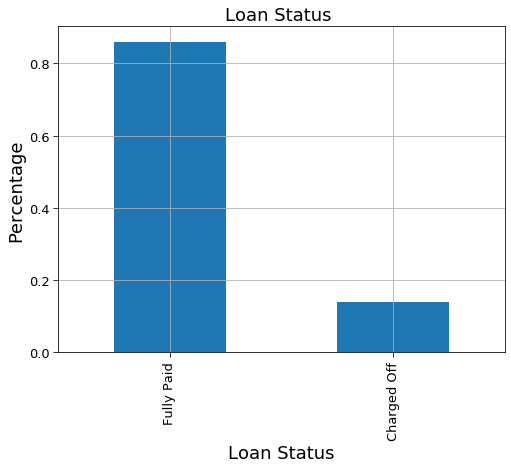

In [1020]:
#Plot percentages 
final_data["loan_status"].value_counts(normalize = True).round(2).plot.bar(figsize=[8,6])
plt.title("Loan Status ",fontsize=18)
plt.xlabel("Loan Status",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

###  <span style='background :cyan' > Findings:- </span>
- **14%** has been defaulted the loan.
- **83%** has fully paid the loan.
- close to **3%** are in a process of paying the loan.

### `Analyse "loan_amnt","funded_amnt","funded_amnt_inv"`
- `loan_amnt :The listed amount of the loan applied for by the borrower`
- `funded_amnt :The total amount committed to that loan at that point in time.`
- `funded_amnt_inv : The total amount committed by investors for that loan at that point in time.`



In [1021]:
final_data[["loan_amnt","funded_amnt","funded_amnt_inv"]].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,36136.000000,36136.000000,36136.000000
mean,11102.801915,10839.244106,10266.977004
std,7312.947963,7059.279835,6993.092966
min,500.000000,500.000000,0.000000
25%,5500.000000,5400.000000,5000.000000
50%,10000.000000,9600.000000,8875.000000
75%,15000.000000,15000.000000,14000.000000
max,35000.000000,35000.000000,35000.000000


In [1022]:
# pd.qcut(final_data["loan_amnt"],10)
final_data["loan_amnt"].value_counts().head(20)

10000    2660
12000    2152
5000     1867
6000     1776
15000    1737
8000     1465
20000    1464
25000    1245
4000     1033
7000      946
3000      935
16000     744
9000      640
18000     581
14000     578
35000     545
7500      507
2000      478
24000     424
4800      394
Name: loan_amnt, dtype: int64

In [759]:
final_data[["loan_amnt","funded_amnt","funded_amnt_inv"]].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981541,0.936337
funded_amnt,0.981541,1.000000,0.954866
funded_amnt_inv,0.936337,0.954866,1.000000


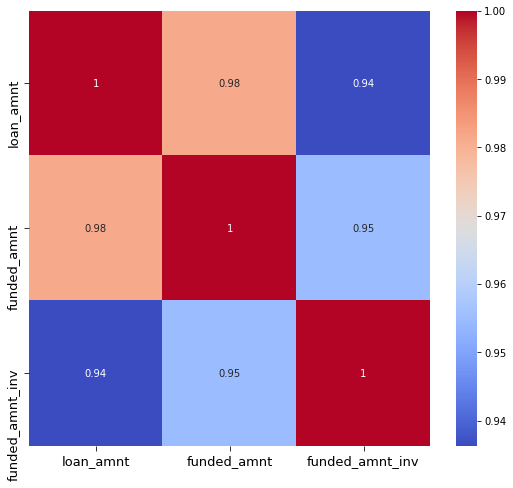

In [760]:
# Heatmap showing Hoe the below fields are correlated.
plt.figure(figsize=(9,8))
sns.heatmap(final_data[["loan_amnt","funded_amnt","funded_amnt_inv"]].corr(),annot=True,cmap='coolwarm',)
plt.tick_params(size=5,labelsize = 13)
# plt.title("Heat map for Loan Amount, Funded Amount,Funded Amount Invoice",fontsize=15)


###  <span style='background :cyan' > Findings:- </span>
- `loan_amnt","funded_amnt","funded_amnt_inv are highly correlated through pearson correlation.`
- `We will consider only loan_amnt.`

### Loan Amount distributions

In [1029]:
#Plot distributions
def plot_distributions(column_name,x_label):
    plt.figure(figsize=(10,8))
    sns.distplot(final_data[column_name],bins=20,color="green") # bins=40, 30, 50
    plt.title(f"{column_name} Distributions ",fontsize=18)
    plt.xlabel(x_label,fontsize=18)
    # plt.ylabel("Count",fontsize=18)
    plt.tick_params(size=5,labelsize = 13)
    plt.grid(0.3)



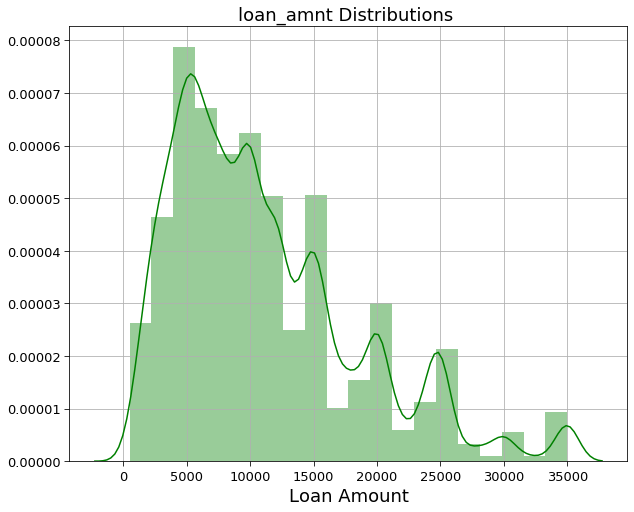

In [1030]:
plot_distributions("loan_amnt","Loan Amount")

In [1032]:
def plot_box(column_name,x_label):
    plt.figure(figsize=(8,6))
    sns.boxplot(final_data[column_name],color="green")
    plt.title(f"{column_name} Distributions with BOX ",fontsize=18)
    plt.xlabel(x_label,fontsize=18)
    # plt.ylabel("Count",fontsize=18)
    plt.tick_params(size=5,labelsize = 13)
    plt.grid(0.3)

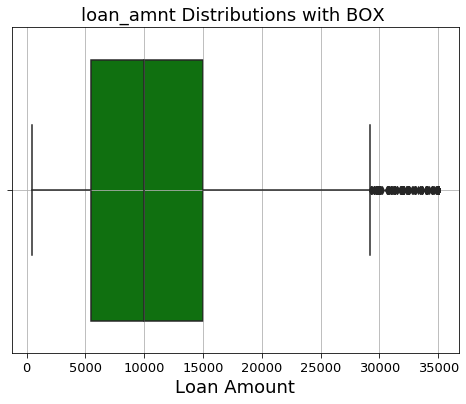

In [1033]:
plot_box('loan_amnt',"Loan Amount")

###  <span style='background :cyan' > Findings:- </span>
- `In loan_amnt column, most of the data lies in 5000 to 15000`
- `We created  binnning with 3 label [LOW, MID, HIGH] and 3 intervals :` 
- `The intervals are [(499.999, 7000.0] < (7000.0, 12875.0] < (12875.0, 35000.0] `
- `The Funded Amount , Funded Amount Invoice and Loan amount are lies with similar intervals as they are highly correlated`


### `Loan Amount Binning`


In [1034]:
# Convert "Loan_amnt" to bins 
pd.qcut(final_data["loan_amnt"],q=3)

1        (499.999, 6600.0]
3        (6600.0, 12250.0]
5        (499.999, 6600.0]
6        (6600.0, 12250.0]
7        (499.999, 6600.0]
               ...        
39710    (499.999, 6600.0]
39711    (499.999, 6600.0]
39712    (499.999, 6600.0]
39713    (6600.0, 12250.0]
39716    (6600.0, 12250.0]
Name: loan_amnt, Length: 36136, dtype: category
Categories (3, interval[float64]): [(499.999, 6600.0] < (6600.0, 12250.0] < (12250.0, 35000.0]]

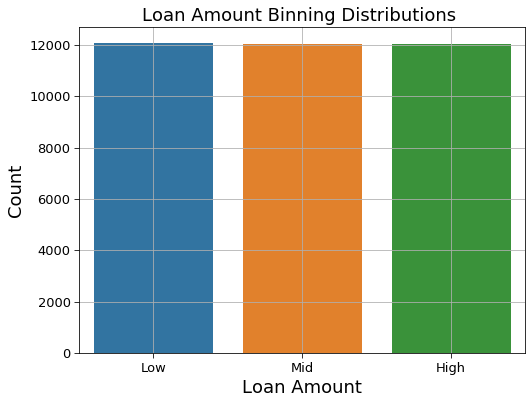

In [1036]:
#Convert loan amount to Range and assign Label to it
bin_loan_amnt = pd.qcut(final_data["loan_amnt"],q=3,labels=["Low","Mid","High"])
plt.figure(figsize=(8,6))
sns.countplot(bin_loan_amnt)
plt.title("Loan Amount Binning Distributions ",fontsize=18)
plt.xlabel("Loan Amount",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

### `Funded Amount`

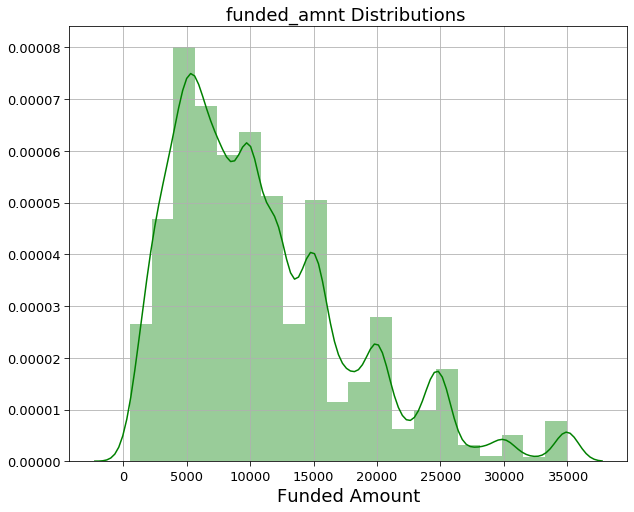

In [1037]:
plot_distributions("funded_amnt","Funded Amount")

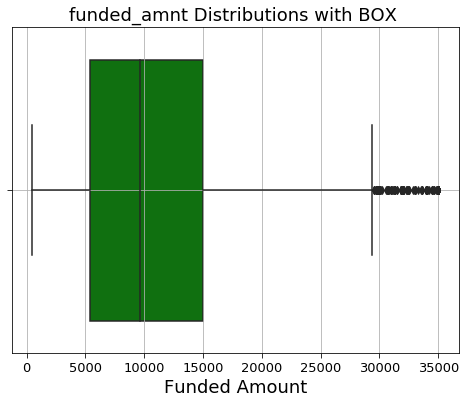

In [1038]:
plot_box("funded_amnt","Funded Amount")

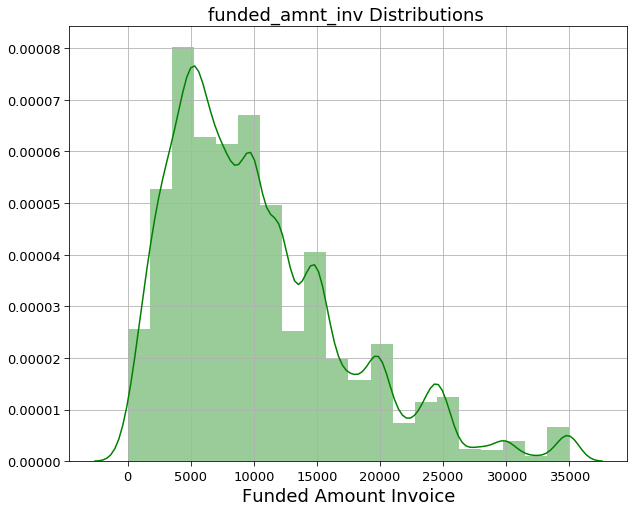

In [1039]:
plot_distributions("funded_amnt_inv","Funded Amount Invoice")

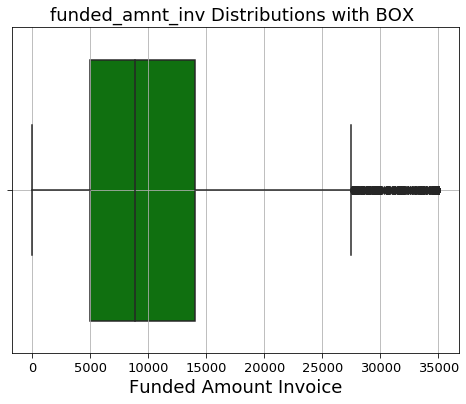

In [1040]:
plot_box("funded_amnt_inv","Funded Amount Invoice")

### `Term analysis`

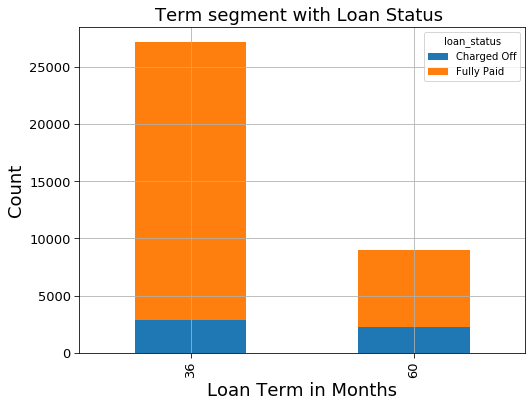

In [1041]:
# plt.figure(figsize=(10,10))
pd.pivot_table(data=final_data,index="term",columns="loan_status",values = "loan_amnt",aggfunc="count").\
plot.bar(stacked=True,figsize=[8,6])
plt.title("Term segment with Loan Status ",fontsize=18)
plt.xlabel("Loan Term in Months",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

In [1052]:
def plot_univariate_segment(column_name,x_label):
    final_data.groupby(by=column_name)["loan_status"].value_counts(normalize=True).unstack().plot.bar(stacked=True, figsize=[8,6])
    plt.title(f"{column_name} segment with Loan Status ",fontsize=18)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel("Percentage",fontsize=18)
    plt.tick_params(size=5,labelsize = 13)
    plt.legend(loc='best', bbox_to_anchor=(1,1))
    plt.grid(0.3)
# sns.countplot(data=final_data,x="term",hue="loan_status")

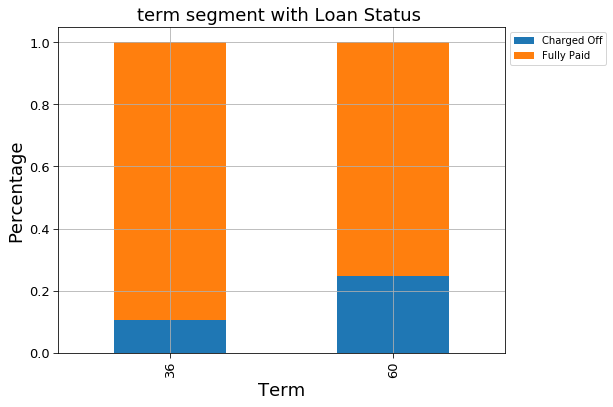

In [1053]:
plot_univariate_segment("term","Term")

###  <span style='background :cyan' > Findings:- </span>
- `Defauter percentages are high in 60 month term loan`
- `more than 20% are defaulters in 60 month term`
- `Close to 10% defaulters are in 36 month term loan`


### `Interest rate distributions` 

In [1044]:
final_data["int_rate"].describe()

count    36136.000000
mean        11.968718
std          3.684652
min          5.420000
25%          9.010000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

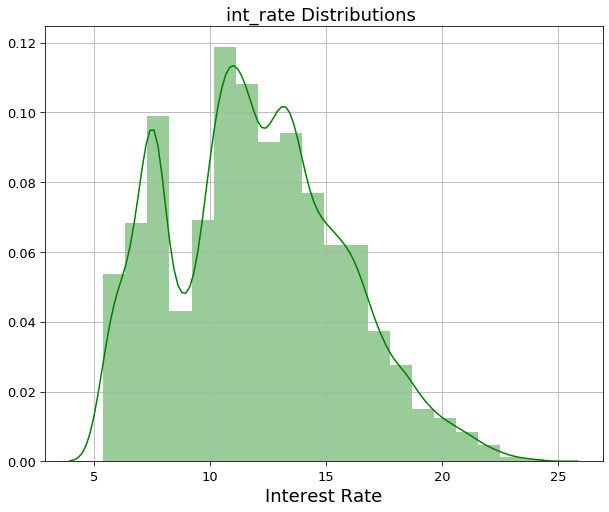

In [1047]:
plot_distributions("int_rate","Interest Rate")

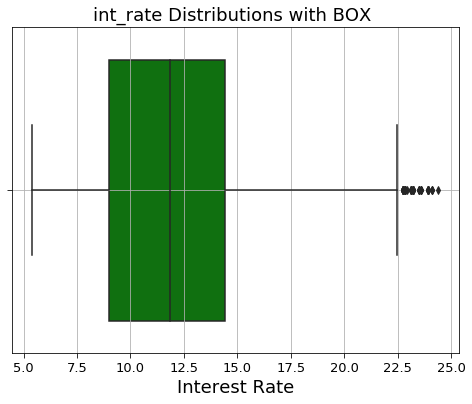

In [1048]:
plot_box("int_rate","Interest Rate")

##  <span style='background :cyan' > Findings:- </span>
- `Most Interest rates lies aproximately between 10 to 15 percent.`

In [1049]:
# final_data["int_rate"].value_counts()
# final_data.groupby(by="int_rate")["loan_status"].value_counts()

# Binning of interest rates
final_data["bin_int_rate"] = pd.qcut(final_data["int_rate"],q=3,labels=["Low","Mid","High"])
final_data["bin_int_rate"].value_counts()


Low     12348
Mid     12176
High    11612
Name: bin_int_rate, dtype: int64

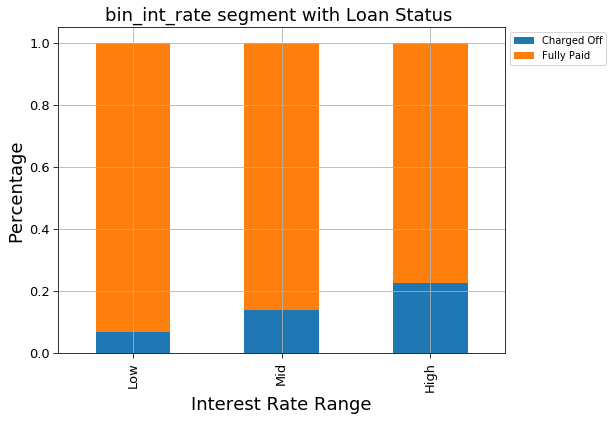

In [1054]:
# final_data.groupby(by="bin_int_rate")["loan_status"].value_counts(normalize=True).unstack().plot.bar(stacked=True,figsize=[10,8])
# plt.title("Interest Rate Distributions ",fontsize=18)
# plt.xlabel("Interest Rate",fontsize=18)
# plt.ylabel("Percentage",fontsize=18)
# plt.tick_params(size=5,labelsize = 13)
# plt.grid(0.3)

plot_univariate_segment("bin_int_rate","Interest Rate Range")

##  <span style='background :cyan' > Findings:- </span>
- ` High interest mean high chances that they will be defaulter.`

### `Installment Distributions`

In [775]:
final_data["installment"].describe()

count    36030.000000
mean       324.106670
std        207.202745
min         16.080000
25%        167.730000
50%        280.910000
75%        426.815000
max       1305.190000
Name: installment, dtype: float64

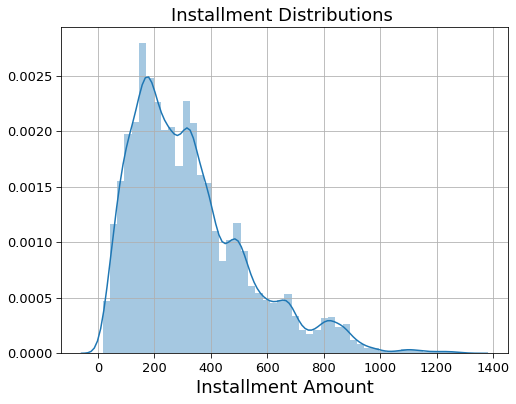

In [776]:
plot_dis

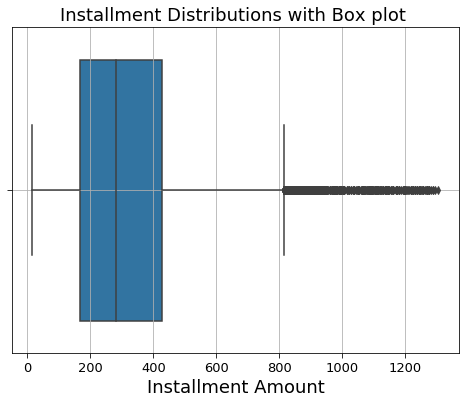

In [777]:
plt.figure(figsize=(8,6))
sns.boxplot(final_data["installment"]) # bins=40, 30, 50
plt.title("Installment Distributions with Box plot ",fontsize=18)
plt.xlabel("Installment Amount",fontsize=18)
# plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

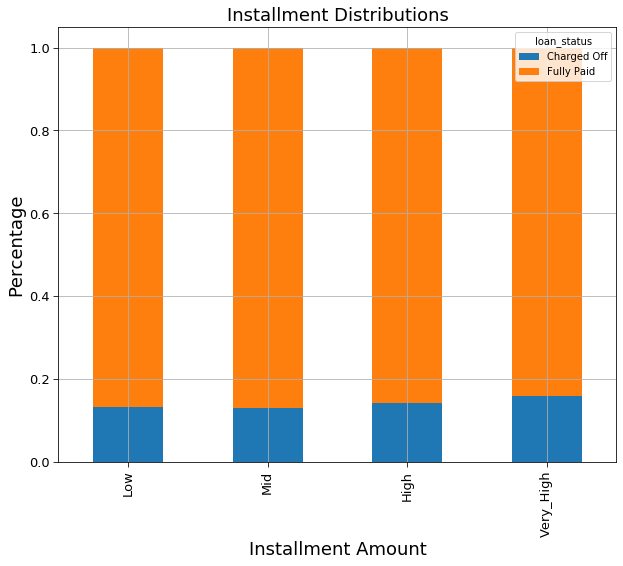

In [778]:
final_data["bin_installment"] = pd.qcut(final_data["installment"],q=4,labels=["Low","Mid","High","Very_High"])
final_data.groupby(by="bin_installment")["loan_status"].value_counts(normalize=True).unstack().plot.\
bar(stacked=True,figsize=[10,8])
plt.title("Installment Distributions",fontsize=18)
plt.xlabel("Installment Amount",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `Most of the installment lies between aproximately 200 to 400.`
- `High installment gradually increases the defaulter rate.`

In [779]:
# p_install = pd.pivot_table(data=final_data,index="bin_installment",columns="loan_status",\
#                            values = "loan_amnt",aggfunc="mean" )


### `Employee Title `

In [780]:
final_data[final_data["loan_status"]=="Charged Off"]["emp_title"].str.lower().value_counts()

us army                          29
bank of america                  24
walmart                          20
at&t                             16
ups                              16
                                 ..
hrs clothing                      1
j.r. electric                     1
the grind cafe                    1
berea college                     1
neurology center of carolinas     1
Name: emp_title, Length: 4410, dtype: int64

### ` grade and Subgrade `

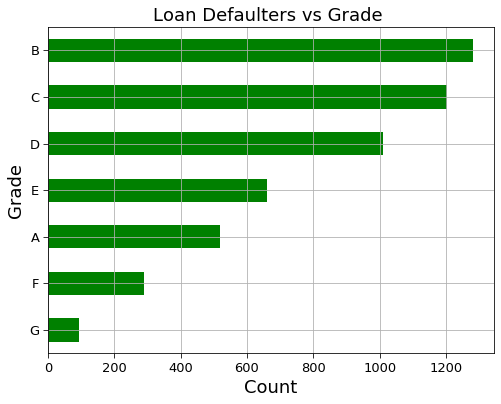

In [781]:
plt.figure(figsize=(8,6))
final_data[final_data["loan_status"]=="Charged Off"]["grade"].\
value_counts().sort_values().plot.barh(color="green")
plt.title("Loan Defaulters vs Grade ",fontsize=18)
plt.xlabel("Count",fontsize=18)
plt.ylabel("Grade",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

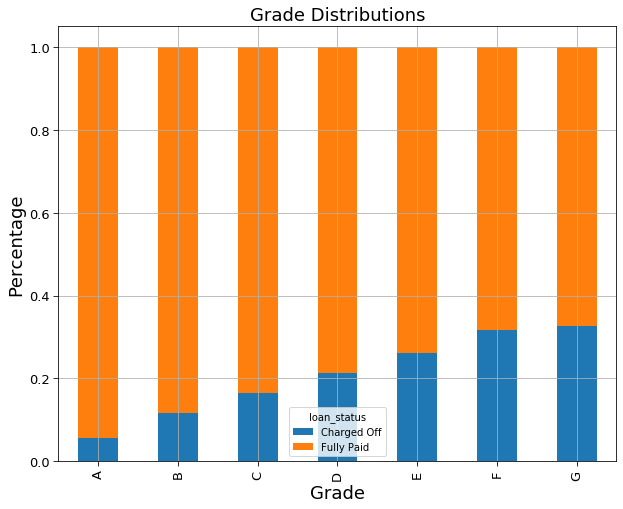

In [782]:
final_data.groupby(by="grade")["loan_status"].value_counts(normalize=True).unstack().plot.bar(stacked=True,figsize=[10,8])
plt.title("Grade Distributions",fontsize=18)
plt.xlabel("Grade",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `Most no of defaulters are in grade B`.
- `From Segment Analysis, The high no of percentages of defaulters are from G.`

### `Defaulters vs sub_grade`

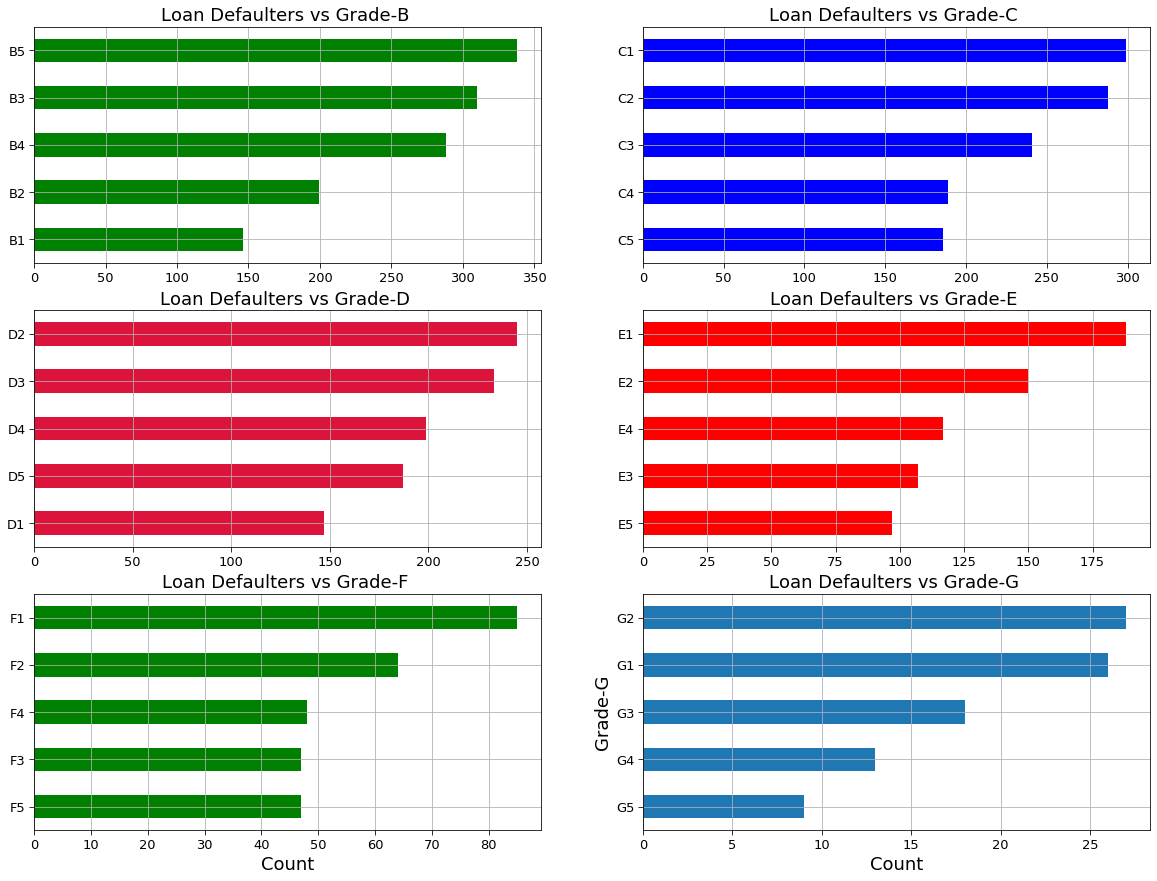

In [783]:
plt.figure(figsize=(20,20))
plt.subplot(421)
final_data[(final_data["loan_status"]=="Charged Off") & (final_data["grade"]=='B') ]["sub_grade"].\
value_counts().sort_values().plot.barh(color="green")
plt.title("Loan Defaulters vs Grade-B ",fontsize=18)
# plt.xlabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)
# plt.tight_layout(pad = 3.0)

# plt.figure(figsize=(8,6))
plt.subplot(422)
final_data[(final_data["loan_status"]=="Charged Off") & (final_data["grade"]=='C') ]["sub_grade"].\
value_counts().sort_values().plot.barh(color="blue")
plt.title("Loan Defaulters vs Grade-C ",fontsize=18)
# plt.xlabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

# plt.figure(figsize=(8,6))
plt.subplot(423)
final_data[(final_data["loan_status"]=="Charged Off") & (final_data["grade"]=='D') ]["sub_grade"].\
value_counts().sort_values().plot.barh(color="crimson")
plt.title("Loan Defaulters vs Grade-D ",fontsize=18)
# plt.xlabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

# plt.figure(figsize=(8,6))
plt.subplot(424)
final_data[(final_data["loan_status"]=="Charged Off") & (final_data["grade"]=='E') ]["sub_grade"].\
value_counts().sort_values().plot.barh(color="red")
plt.title("Loan Defaulters vs Grade-E ",fontsize=18)
# plt.xlabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

# plt.figure(figsize=(8,6))
plt.subplot(425)
final_data[(final_data["loan_status"]=="Charged Off") & (final_data["grade"]=='F') ]["sub_grade"].\
value_counts().sort_values().plot.barh(color="green")
plt.title("Loan Defaulters vs Grade-F ",fontsize=18)
plt.xlabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

# plt.figure(figsize=(8,6))
plt.subplot(426)
final_data[(final_data["loan_status"]=="Charged Off") & (final_data["grade"]=='G') ]["sub_grade"].\
value_counts().sort_values().plot.barh()
plt.title("Loan Defaulters vs Grade-G ",fontsize=18)
plt.xlabel("Count",fontsize=18)
plt.ylabel("Grade-G",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)


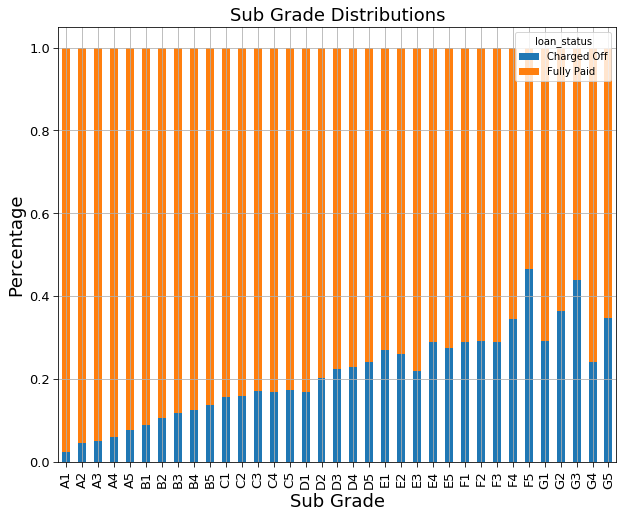

In [784]:
final_data.groupby(by='sub_grade')["loan_status"].value_counts(normalize=True).unstack().plot.\
bar(stacked=True,figsize=[10,8])
plt.title("Sub Grade Distributions",fontsize=18)
plt.xlabel("Sub Grade",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `In each grade subgrade B5, C1,D2, E1,F1,G2 have most no of Defualters.`
- ` From Segmented analysis, F5 has most percentages of defaulters.`

### `Employee work experience duration `

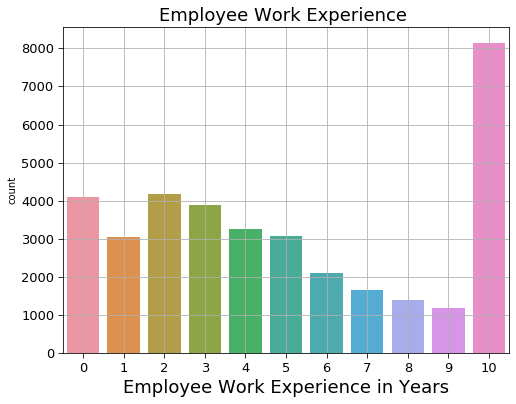

In [785]:
plt.figure(figsize=(8,6))
sns.countplot(final_data["emp_length"])
plt.title("Employee Work Experience ",fontsize=18)
plt.xlabel("Employee Work Experience in Years",fontsize=18)
# plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>

- `Most of the employee has 10 or 10+ years of experience.`

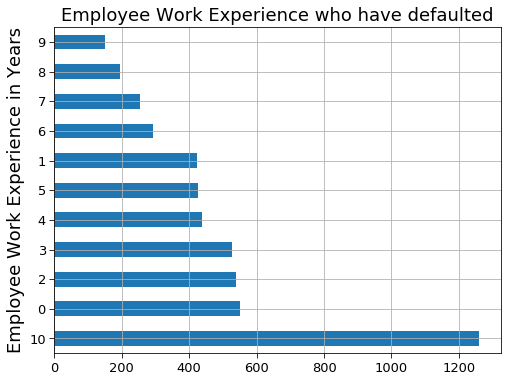

In [786]:
plt.figure(figsize=(8,6))
final_data[final_data["loan_status"]=="Charged Off"]["emp_length"].value_counts().plot.barh()
plt.title("Employee Work Experience who have defaulted",fontsize=18)
plt.ylabel("Employee Work Experience in Years",fontsize=18)
# plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

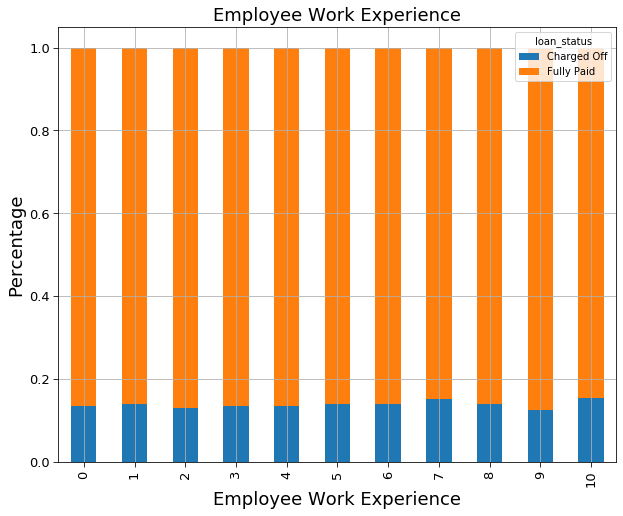

In [787]:
# plt.figure(figsize=(20,20))
final_data.groupby(by="emp_length")["loan_status"].value_counts(normalize=True).unstack().plot.\
bar(stacked=True,figsize=[10,8])
plt.title("Employee Work Experience",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.xlabel("Employee Work Experience",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

# segmented_exp_df = pd.DataFrame(segmented_exp)
# segmented_exp_df["emp_length"] = segmented_exp_df.index


##  <span style='background :cyan' > Findings:- </span>
- `In all experieces level the percetages of defaultes are almost eqaul.`
- `from 10 or 10+ years the no of defaulters are more.`

### `Loan status, Grade and emp_length analysis`

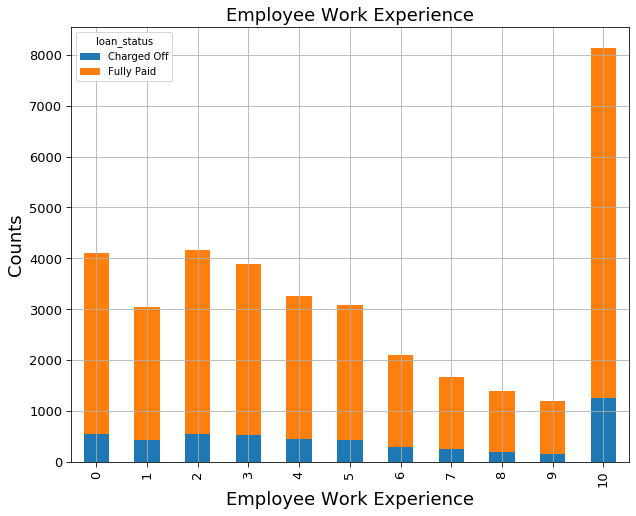

In [788]:
# plt.figure(figsize=(10,8))
df = pd.pivot_table(data=final_data,index="emp_length",columns="loan_status",values = "grade",aggfunc="count")
df.plot.bar(stacked=True,figsize=[10,8])
plt.title("Employee Work Experience",fontsize=18)
plt.ylabel("Counts",fontsize=18)
plt.xlabel("Employee Work Experience",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)


##  <span style='background :cyan' > Findings:- </span>

- ` most no of employee 10 or 10+ years experiece belongs defaulteres.`

In [789]:
# df= df.apply(lambda x: x/sum(x),axis=1)

In [790]:
# df.plot.bar(stacked=True,figsize=[10,8])

In [791]:
# df.apply(lambda x: x/sum(x),axis=1)

### `Annual Income distributions `

In [792]:
final_data["annual_inc"].describe()

count    3.603000e+04
mean     6.909765e+04
std      6.465785e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.230725e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

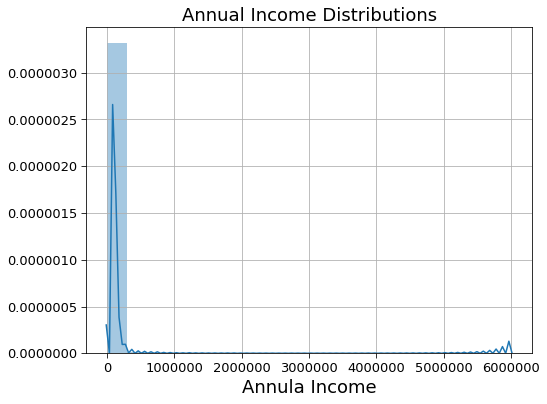

In [793]:
plt.figure(figsize=(8,6))
sns.distplot(final_data["annual_inc"],bins=20)
plt.title("Annual Income Distributions",fontsize=18)
plt.xlabel("Annula Income",fontsize=18)
# plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

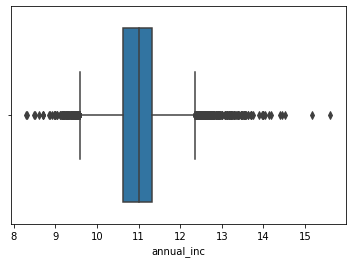

In [794]:
sns.boxplot(np.log(final_data["annual_inc"]))

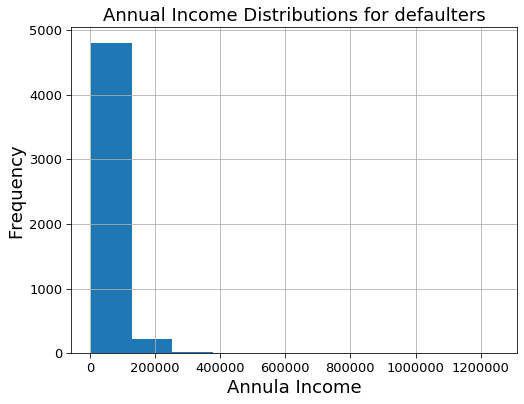

In [795]:
plt.figure(figsize=(8,6))
final_data[final_data["loan_status"]=="Charged Off"]["annual_inc"].plot.hist()
plt.title("Annual Income Distributions for defaulters",fontsize=18)
plt.xlabel("Annula Income",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

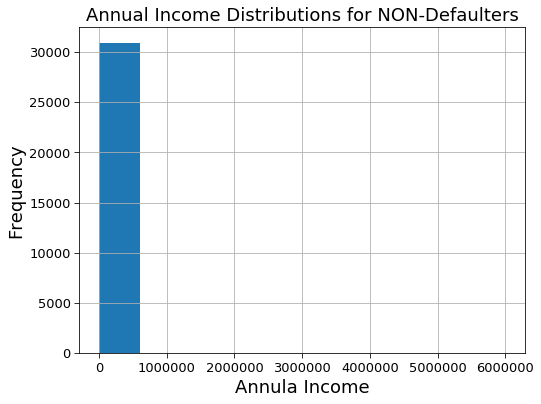

In [796]:
plt.figure(figsize=(8,6))
final_data[~(final_data["loan_status"]=="Charged Off")]["annual_inc"].plot.hist()
plt.title("Annual Income Distributions for NON-Defaulters",fontsize=18)
plt.xlabel("Annula Income",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

In [797]:
final_data.groupby(by="loan_status")["annual_inc"].agg([np.mean,np.median,"count"])

,mean,median,count
loan_status,,,
Charged Off,63181.940010,54000.0,5056
Fully Paid,70063.291491,60000.0,30974


In [798]:
final_data["Annula_Income_Bin"] = pd.qcut(final_data["annual_inc"],q=3,labels=["Low_Income","Mid_Income","High_Income"])
# final_data["annual_inc"].

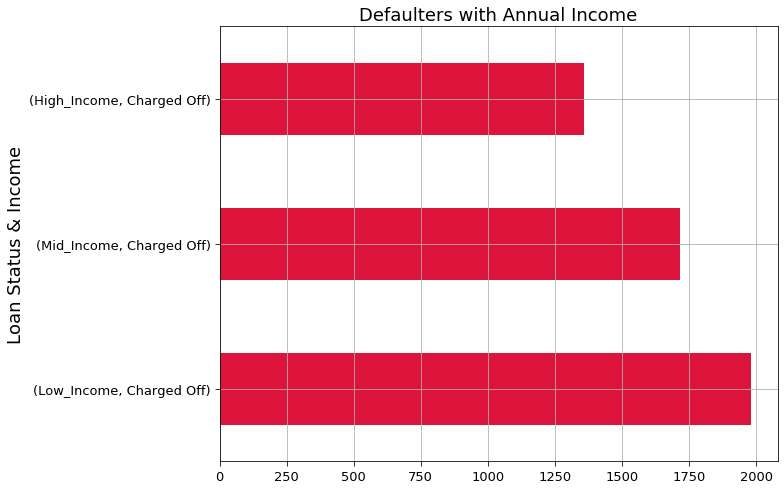

In [799]:
final_data[(final_data["loan_status"]=="Charged Off")].groupby(by="Annula_Income_Bin")["loan_status"].\
value_counts().plot.barh(figsize=[10,8],color="crimson")
plt.title("Defaulters with Annual Income",fontsize=18)
# plt.xlabel("Loan Status",fontsize=18)
plt.ylabel("Loan Status & Income",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

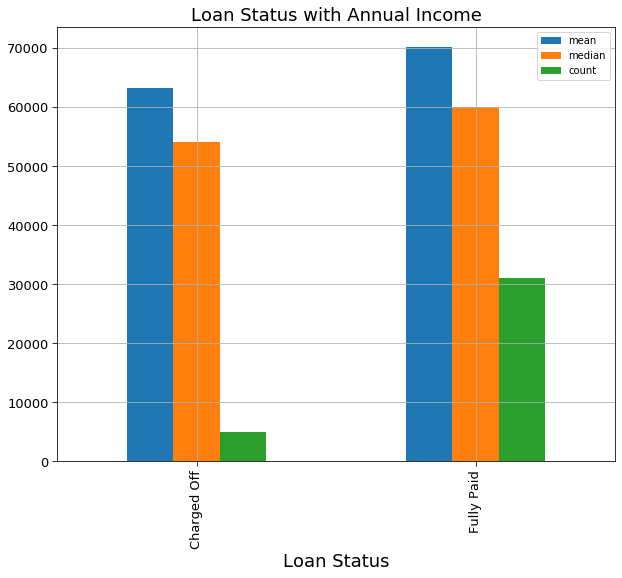

In [800]:
final_data.groupby(by="loan_status")["annual_inc"].agg([np.mean,np.median,"count"]).plot.bar(figsize=[10,8])
plt.title("Loan Status with Annual Income",fontsize=18)
plt.xlabel("Loan Status",fontsize=18)
# plt.ylabel("Aggregations",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>

- `In Low Income group the,There are higher no of defaulters.`
- `Highincome group has lesser no of defaulters.`

###  `Home Ownership vs Defaulters`

In [801]:
final_data[(final_data["loan_status"]=="Charged Off")]["home_ownership"].\
value_counts().sort_values(ascending=False)

RENT        2576
MORTGAGE    2103
OWN          359
OTHER         18
Name: home_ownership, dtype: int64

In [802]:
# Loan status Non defaulter compare to home ownership
final_data[~(final_data["loan_status"]=="Charged Off")]["home_ownership"].\
value_counts().sort_values(ascending =False)

RENT        14856
MORTGAGE    13834
OWN          2207
OTHER          76
NONE            1
Name: home_ownership, dtype: int64

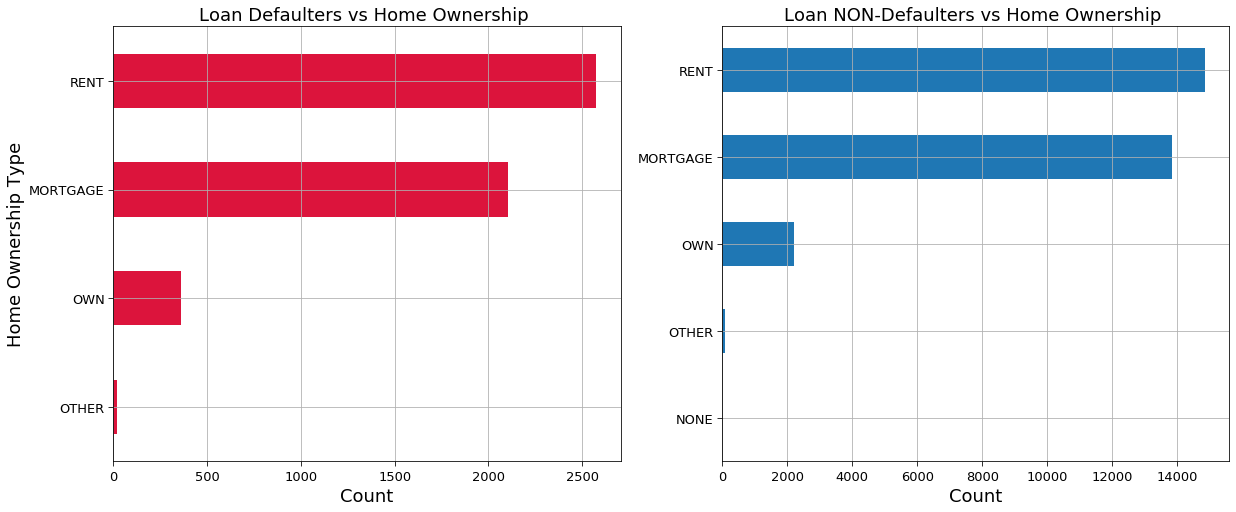

In [803]:
plt.figure(figsize=(20,8))
plt.subplot(121)
final_data[(final_data["loan_status"]=="Charged Off")]["home_ownership"].\
value_counts().sort_values().plot.barh(color="crimson")
plt.title("Loan Defaulters vs Home Ownership ",fontsize=18)
plt.xlabel("Count",fontsize=18)
plt.ylabel("Home Ownership Type",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

plt.subplot(122)
final_data[~(final_data["loan_status"]=="Charged Off")]["home_ownership"].\
value_counts().sort_values().plot.barh()
plt.title("Loan NON-Defaulters vs Home Ownership ",fontsize=18)
plt.xlabel("Count",fontsize=18)
# plt.ylabel("Grade-G",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

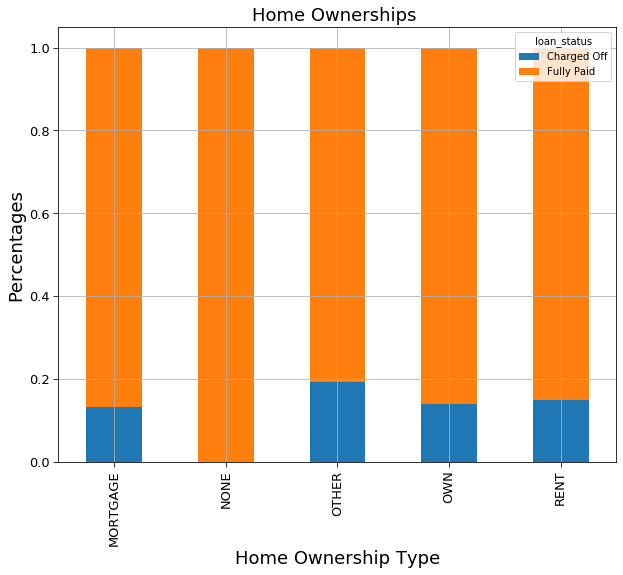

In [804]:
final_data.groupby(by="home_ownership")["loan_status"].value_counts(normalize=True).unstack().plot.\
bar(stacked=True,figsize=[10,8])
plt.title("Home Ownerships ",fontsize=18)
plt.xlabel("Home Ownership Type",fontsize=18)
plt.ylabel("Percentages",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

In [805]:
# final_data[(final_data["loan_status"]=="Charged Off")].groupby(by="home_ownership")["loan_status"].\
# value_counts(normalize=True).unstack().plot.bar(stacked=True)

##  <span style='background :cyan' > Findings:- </span>
- ` "Rent" and "Mortgage" home ownership type has more no of defaulters.`
- `Home Ownership type "Others" has more defaulters in terms of percentages.`

### ` Loan Issue Month & Years Analysis`



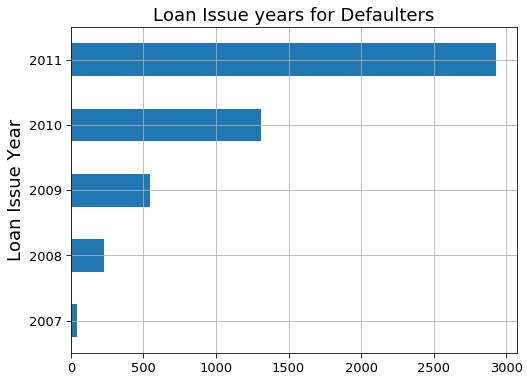

In [806]:
plt.figure(figsize=(8,6))
final_data[(final_data["loan_status"]=="Charged Off")]["issue_d"].dt.year.value_counts(ascending = True).plot.barh()
plt.title("Loan Issue years for Defaulters",fontsize=18)
plt.ylabel("Loan Issue Year",fontsize=18)
# plt.label("Frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)
# final_data["issue_d"].dt.year.value_counts()

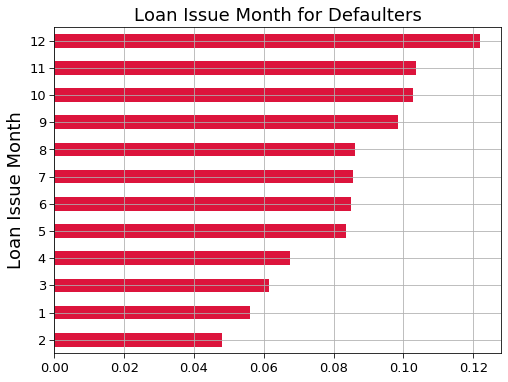

In [807]:
plt.figure(figsize=(8,6))
final_data[(final_data["loan_status"]=="Charged Off")]["issue_d"].dt.month.value_counts(ascending = True,normalize=True).\
plot.barh(color = "crimson")
plt.title("Loan Issue Month for Defaulters",fontsize=18)
plt.ylabel("Loan Issue Month",fontsize=18)

plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

In [808]:
final_data[(final_data["loan_status"]=="Charged Off")]["issue_d"].dt.month.value_counts(ascending = True,normalize=True)

2     0.048062
1     0.055973
3     0.061511
4     0.067445
5     0.083663
6     0.085047
7     0.085641
8     0.086036
9     0.098497
10    0.102650
11    0.103639
12    0.121835
Name: issue_d, dtype: float64

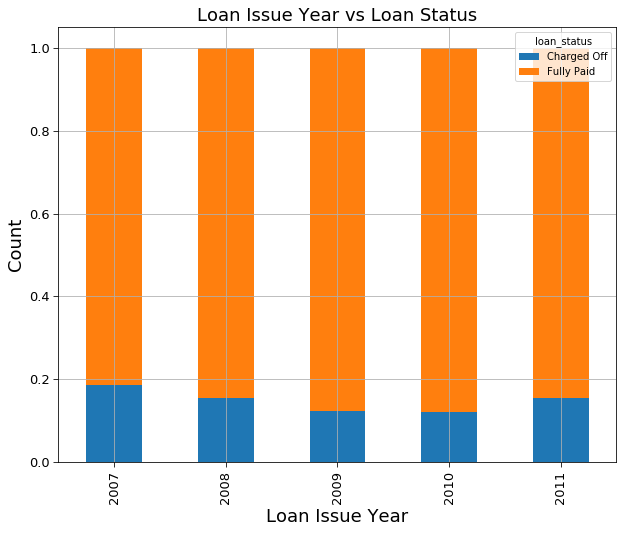

In [862]:
# date = pd.pivot_table(data=final_data,index="issue_d",columns = "loan_status",values = "loan_amnt",aggfunc="count")
final_data.groupby(final_data["issue_d"].dt.year)["loan_status"].\
value_counts(normalize=True).unstack().plot.bar(stacked=True,figsize=[10,8])
plt.title("Loan Issue Year vs Loan Status",fontsize=18)
plt.xlabel("Loan Issue Year",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

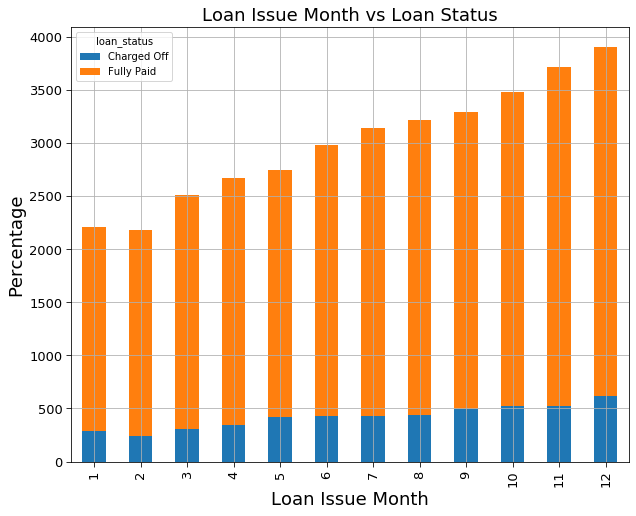

In [863]:
final_data.groupby(final_data["issue_d"].dt.month)["loan_status"].\
value_counts().unstack().plot.bar(stacked=True,figsize=[10,8])
plt.title("Loan Issue Month vs Loan Status",fontsize=18)
plt.xlabel("Loan Issue Month",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `Loan status "Charged Off" gradully increasing from 2007 to 2011.`
- ` Month of December has maximum loan defaults.`

### ` Loan Purpose Distributions `

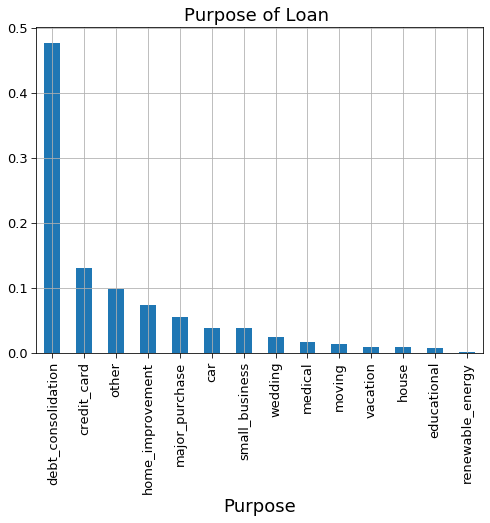

In [864]:
plt.figure(figsize=(8,6))
final_data["purpose"].str.lower().value_counts(normalize=True).plot.bar()
plt.title("Purpose of Loan ",fontsize=18)
plt.xlabel("Purpose",fontsize=18)
# plt.label("Frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

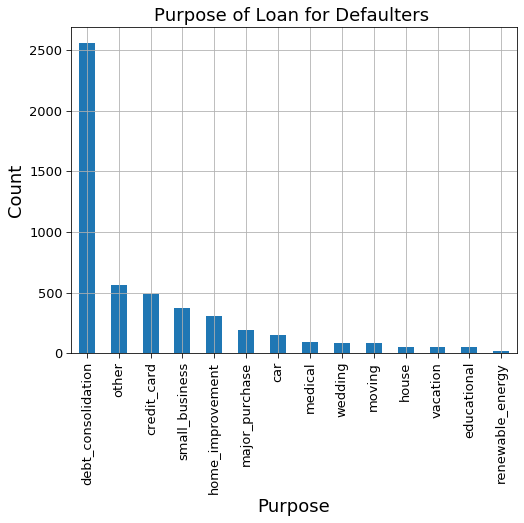

In [865]:
plt.figure(figsize=(8,6))
final_data[(final_data["loan_status"]=="Charged Off")]["purpose"].value_counts().plot.bar()
plt.title("Purpose of Loan for Defaulters ",fontsize=18)
plt.xlabel("Purpose",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

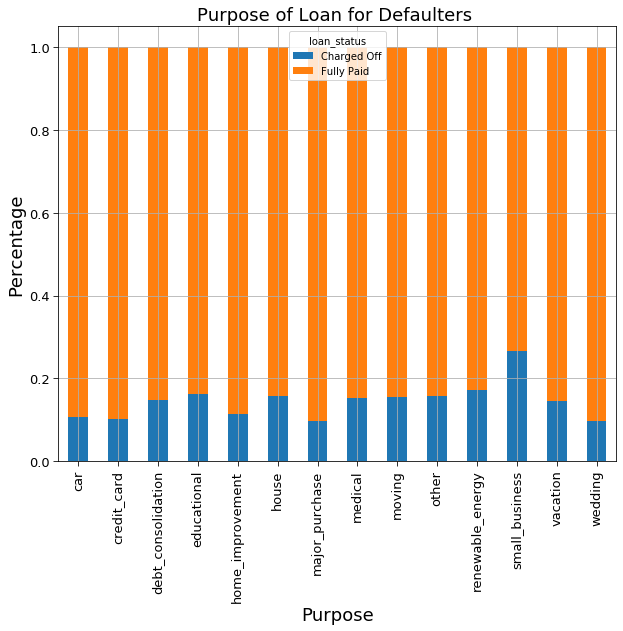

In [866]:
final_data.groupby(by="purpose")["loan_status"].value_counts(normalize=True).unstack()\
.plot.bar(stacked=True,figsize=[10,8])
plt.title("Purpose of Loan for Defaulters ",fontsize=18)
plt.xlabel("Purpose",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `Most no of loan are taken for "Debt Consolidation".`
- `More defaulters have purpose "Debt Consolidation".`
- `People who have taken loan for small business tend to be more Defaulters.`

### `Employee title  who got the loans`

In [867]:
final_data["title"].str.lower().value_counts()

debt consolidation                          2806
debt consolidation loan                     1667
personal loan                                915
consolidation                                667
home improvement                             491
                                            ... 
helpfriendwithmortgage                         1
paula's loan                                   1
floors and outdoors                            1
moving expense/relocation                      1
looking to consolidate credit cards debt       1
Name: title, Length: 16291, dtype: int64

 ### `Zip Code where most of the Loan default happened`

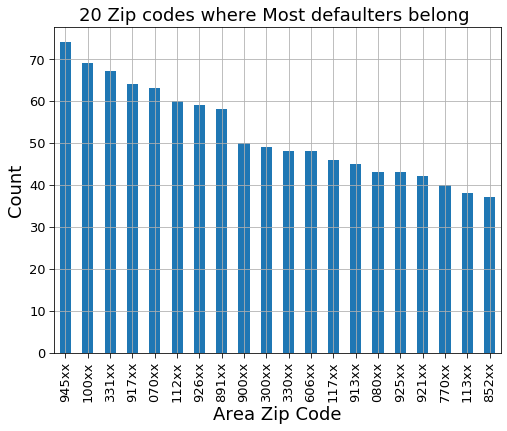

In [815]:
plt.figure(figsize=(8,6))
final_data[(final_data["loan_status"]=="Charged Off")]["zip_code"].value_counts().head(20).plot.bar()
plt.title("20 Zip codes where Most defaulters belong ",fontsize=18)
plt.xlabel("Area Zip Code",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

### `State Address`

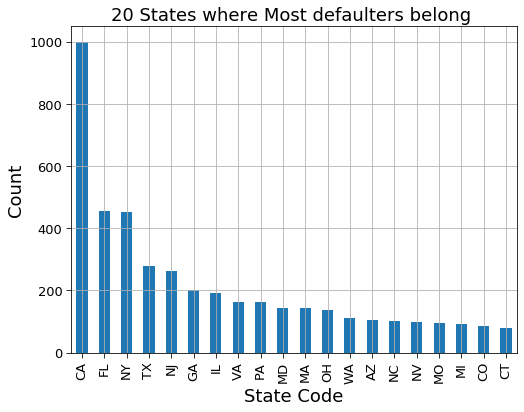

In [816]:
plt.figure(figsize=(8,6))
final_data[(final_data["loan_status"]=="Charged Off")]["addr_state"].value_counts().head(20).plot.bar()
plt.title("20 States where Most defaulters belong ",fontsize=18)
plt.xlabel("State Code",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

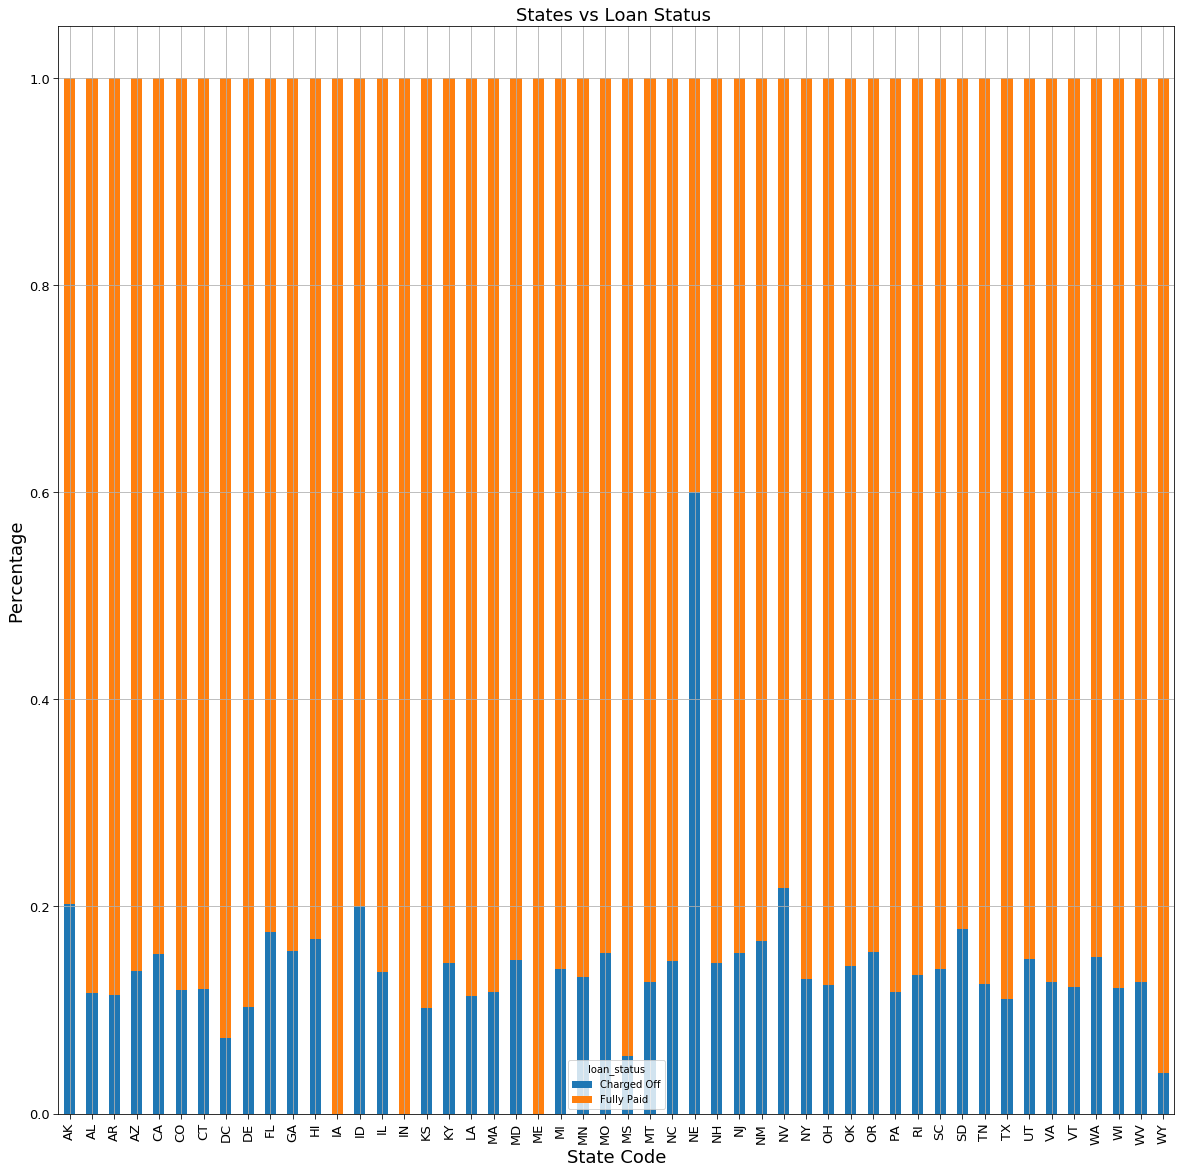

In [817]:
final_data.groupby(by='addr_state')["loan_status"].value_counts(normalize=True).\
unstack().plot.bar(figsize=[20,20],stacked=True)
plt.title("States vs Loan Status ",fontsize=18)
plt.xlabel("State Code",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `State CA has more no of defaulters.`
- `State NE has more percentage of defaulters.`

### ` Inquiries in last  6 months `

In [818]:
final_data["inq_last_6mths"].value_counts()

0    17472
1     9962
2     5305
3     2773
4      288
5      129
6       57
7       31
8       13
Name: inq_last_6mths, dtype: int64

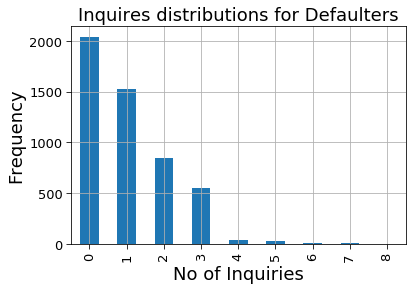

In [819]:
plt.figure(figsize=(6,4))
final_data[(final_data["loan_status"]=="Charged Off")]["inq_last_6mths"].value_counts().plot.bar()
plt.title("Inquires distributions for Defaulters",fontsize=18)
plt.xlabel("No of Inquiries",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

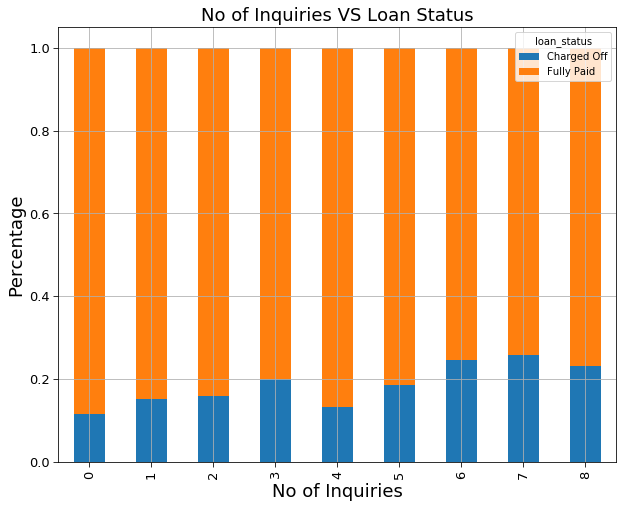

In [820]:
final_data.groupby(by="inq_last_6mths")["loan_status"].value_counts(normalize=True).\
unstack().plot.bar(stacked=True,figsize=[10,8])
plt.title("No of Inquiries VS Loan Status",fontsize=18)
plt.xlabel("No of Inquiries",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `More no of Inquiries tends to increase the Defaulters`
- `But there is no consistent pattern`

### `Debt to Income ratio-dti `

In [821]:
final_data["dti"].describe()

count    36030.000000
mean        13.359743
std          6.644946
min          0.000000
25%          8.270000
50%         13.470000
75%         18.610000
max         29.990000
Name: dti, dtype: float64

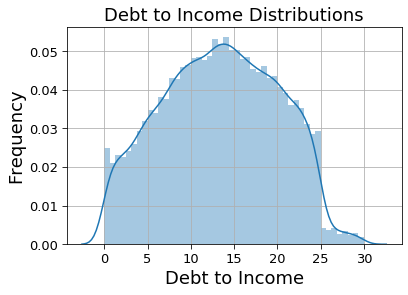

In [822]:
plt.figure(figsize=(6,4))
sns.distplot(final_data["dti"])
plt.title("Debt to Income Distributions",fontsize=18)
plt.xlabel("Debt to Income",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

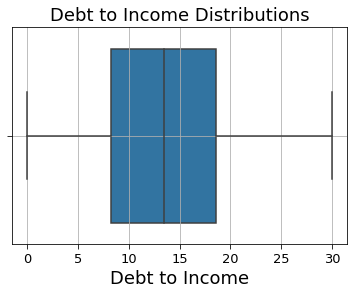

In [823]:
plt.figure(figsize=(6,4))
sns.boxplot(final_data["dti"])
plt.title("Debt to Income Distributions",fontsize=18)
plt.xlabel("Debt to Income",fontsize=18)
# plt.ylabel("Frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

In [824]:
final_data["dti_bin"] = pd.qcut(final_data["dti"],q=4,labels=["Low","Mid","High","Very_High"])

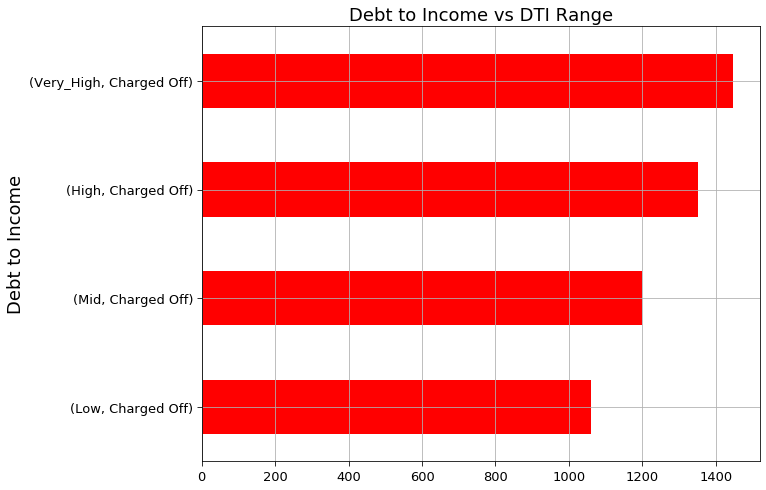

In [825]:
final_data[final_data["loan_status"]=="Charged Off"].groupby(by="dti_bin")["loan_status"].\
value_counts().plot.barh(color="red",figsize=[10,8])
plt.title("Debt to Income vs DTI Range",fontsize=18)
# plt.xlabel("Debt to Income",fontsize=18)
plt.ylabel("Debt to Income",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

In [826]:
final_data.groupby(by="loan_status")["dti"].agg([np.mean,np.median,"count"])

,mean,median,count
loan_status,,,
Charged Off,14.115168,14.4,5056
Fully Paid,13.236432,13.3,30974


##  <span style='background :cyan' > Findings:- </span>
- `DTI ration is dense in terval 8 to 17.`
- `DTI is more means high chances that a person will be a defaulter.`

### `delinq_2yrs	`

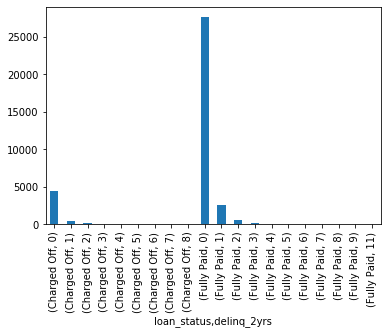

In [827]:
final_data.groupby("loan_status")["delinq_2yrs"].value_counts().plot.bar()

In [828]:
final_data["loan_status"].value_counts()

Fully Paid     30974
Charged Off     5056
Name: loan_status, dtype: int64

### `earliest credit line`

In [829]:
# Calculate year difference between  Earliest Credit Line and Loan Issue Date
tempdf["year"] = final_data["earliest_cr_line"].dt.year - final_data["issue_d"].dt.year
# # min(tempdf)
# tempdf["year"].describe()
final_data["diff_issue_date_ecl"] =tempdf["year"]

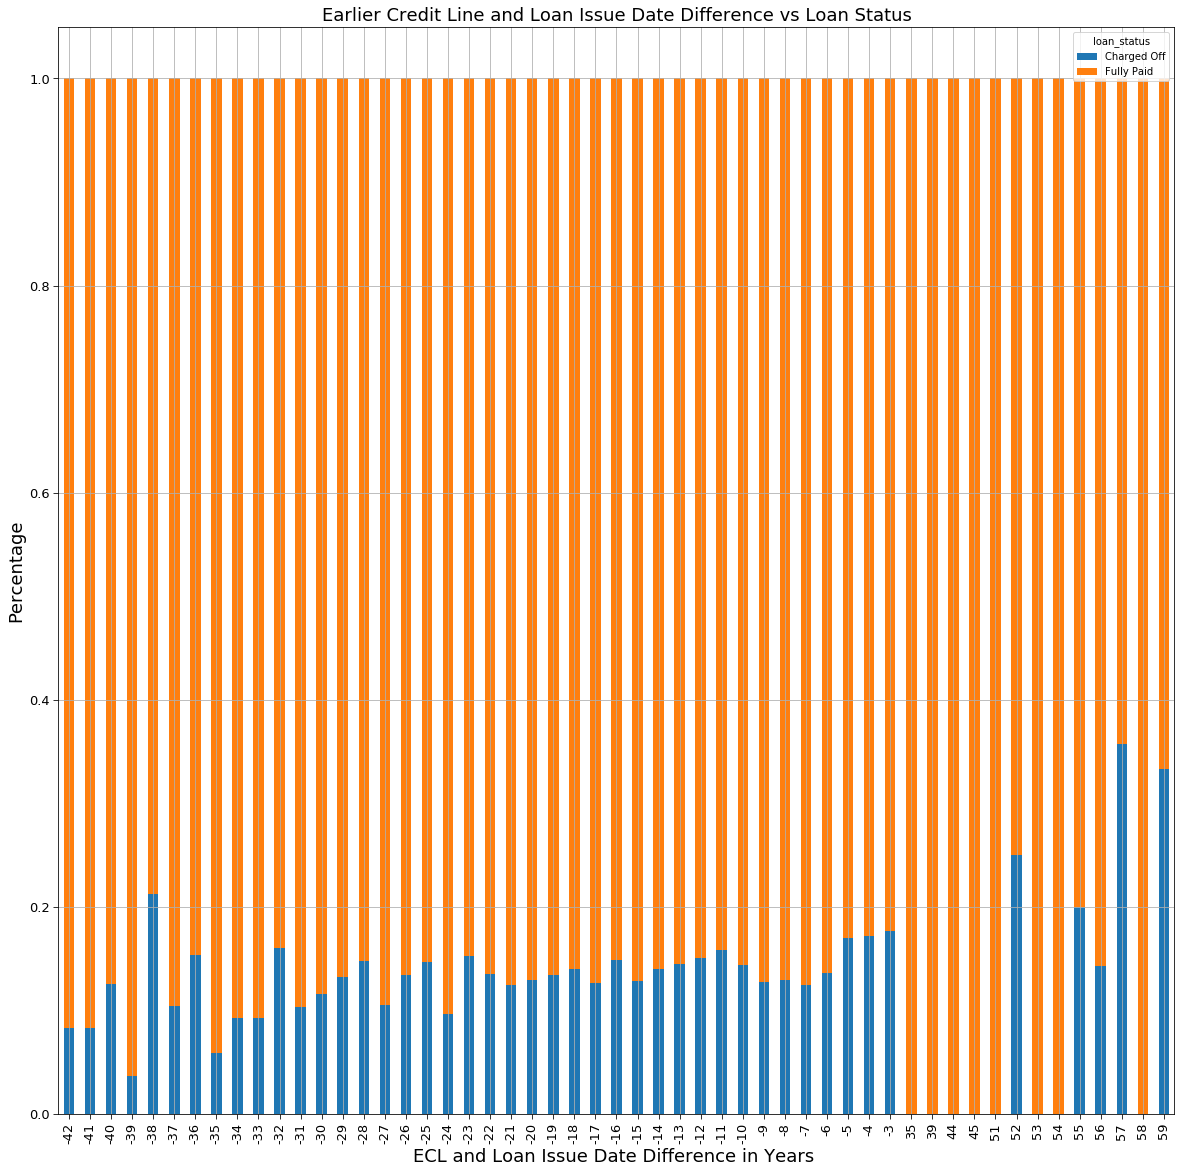

In [830]:
final_data.groupby(by="diff_issue_date_ecl")["loan_status"].value_counts(normalize=True).unstack().\
plot.bar(stacked=True,figsize=[20,20])
plt.title("Earlier Credit Line and Loan Issue Date Difference vs Loan Status",fontsize=18)
plt.xlabel("ECL and Loan Issue Date Difference in Years ",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `distribution of loan Staus by borrowers' earliest credit line.`
- `Borrowers who have year of earliest credit line is long  less prone to be a defaulters.`

### `The number of open credit lines(open_acc).`


In [831]:
final_data["open_acc"].value_counts()

7     3646
6     3570
8     3565
9     3400
10    2917
5     2864
11    2531
12    2086
4     2084
13    1747
14    1350
3     1324
15    1088
16     862
17     672
2      507
18     492
19     368
20     270
21     227
22     131
23      86
24      67
25      50
26      29
28      23
27      21
30      14
29      12
31       7
34       5
33       3
32       3
36       2
35       2
38       1
39       1
41       1
42       1
44       1
Name: open_acc, dtype: int64

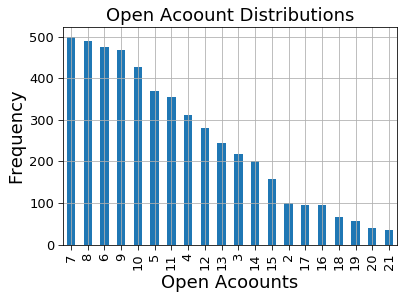

In [832]:
plt.figure(figsize=(6,4))
final_data[(final_data["loan_status"]=="Charged Off")]["open_acc"].value_counts().head(20).plot.bar()
plt.title("Open Acoount Distributions",fontsize=18)
plt.xlabel("Open Acoounts",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

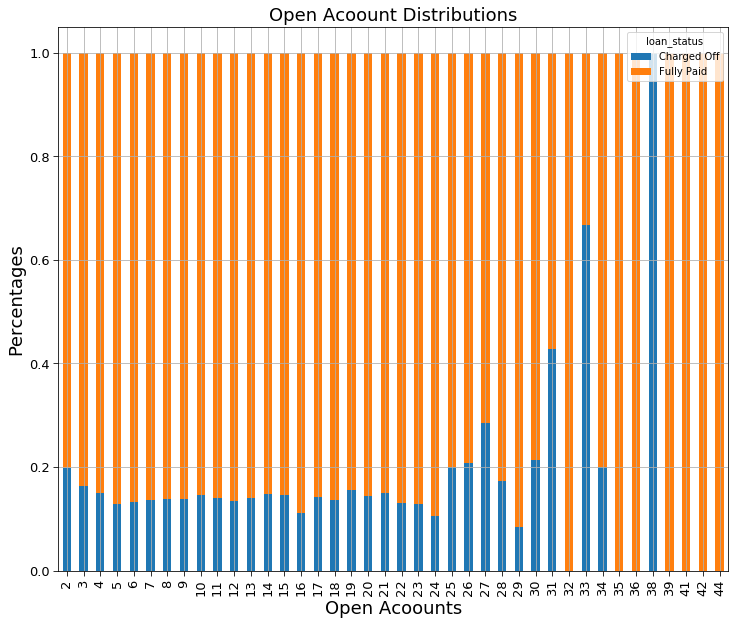

In [833]:
final_data.groupby(by="open_acc")["loan_status"].value_counts(normalize=True).unstack().plot.bar(stacked=True,figsize=[12,10])
plt.title("Open Acoount Distributions",fontsize=18)
plt.xlabel("Open Acoounts",fontsize=18)
plt.ylabel("Percentages",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- 

### `No of Derogatory Public Records.`

In [834]:
final_data["pub_rec"].value_counts()

0    34159
1     1817
2       45
3        7
4        2
Name: pub_rec, dtype: int64

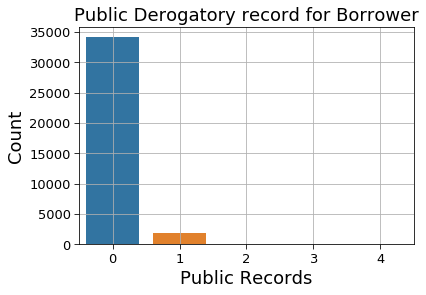

In [835]:
plt.figure(figsize=(6,4))
sns.countplot(final_data["pub_rec"])
plt.title("Public Derogatory record for Borrower",fontsize=18)
plt.xlabel("Public Records",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

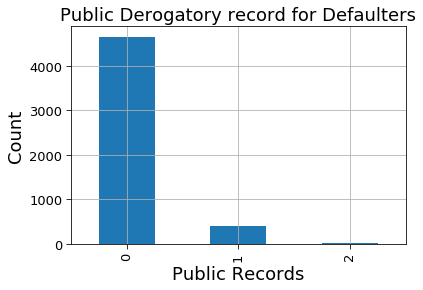

In [836]:
plt.figure(figsize=(6,4))
final_data[(final_data["loan_status"]=="Charged Off")]["pub_rec"].value_counts().plot.bar()
plt.title("Public Derogatory record for Defaulters",fontsize=18)
plt.xlabel("Public Records",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

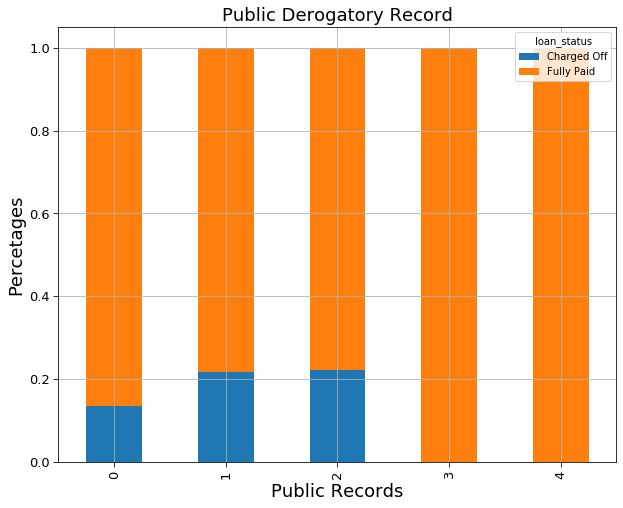

In [837]:
final_data.groupby(by="pub_rec")["loan_status"].value_counts(normalize=True).unstack().\
plot.bar(stacked=True,figsize=[10,8])
plt.title("Public Derogatory Record",fontsize=18)
plt.xlabel("Public Records",fontsize=18)
plt.ylabel("Percetages",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>

- `Public derogatory record distributons.`

### `Total credit revolving balance.`

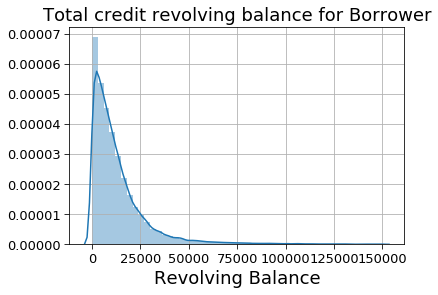

In [838]:
# final_data["revol_bal"].
plt.figure(figsize=(6,4))
sns.distplot(final_data["revol_bal"])
plt.title("Total credit revolving balance for Borrower",fontsize=18)
plt.xlabel("Revolving Balance",fontsize=18)
# plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

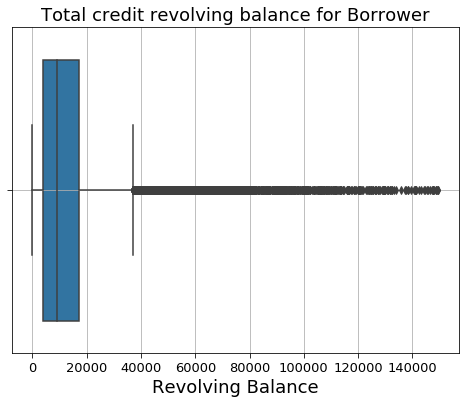

In [839]:
plt.figure(figsize=(8,6))
sns.boxplot(final_data["revol_bal"])
plt.title("Total credit revolving balance for Borrower",fontsize=18)
plt.xlabel("Revolving Balance",fontsize=18)
# plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

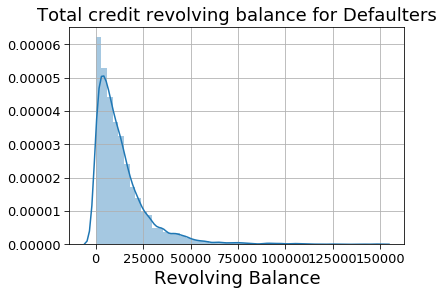

In [840]:
plt.figure(figsize=(6,4))
sns.distplot(final_data[(final_data["loan_status"]=="Charged Off")]["revol_bal"])
plt.title("Total credit revolving balance for Defaulters",fontsize=18)
plt.xlabel("Revolving Balance",fontsize=18)
# plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

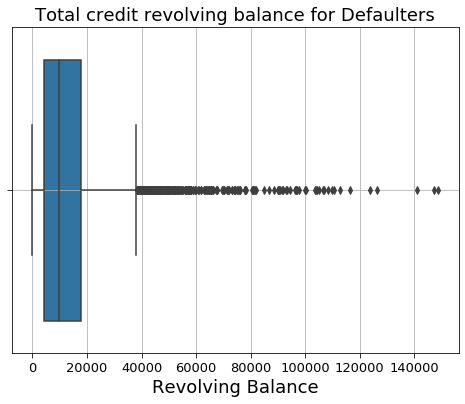

In [841]:
plt.figure(figsize=(8,6))
sns.boxplot(final_data[(final_data["loan_status"]=="Charged Off")]["revol_bal"])
plt.title("Total credit revolving balance for Defaulters",fontsize=18)
plt.xlabel("Revolving Balance",fontsize=18)
# plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

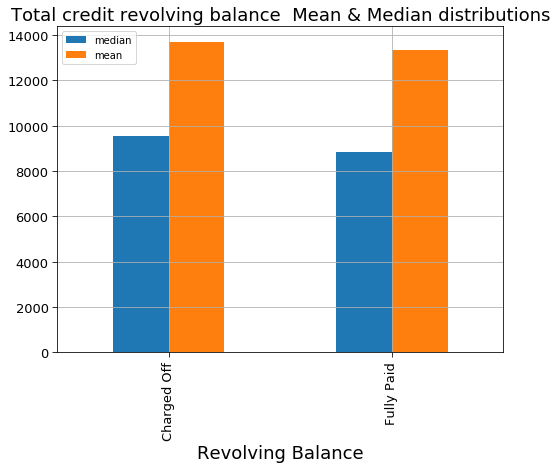

In [842]:
final_data.groupby(by="loan_status")["revol_bal"].agg([np.median,np.mean]).plot.bar(figsize=[8,6])
plt.title("Total credit revolving balance  Mean & Median distributions",fontsize=18)
plt.xlabel("Revolving Balance",fontsize=18)
# plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

### `Revolving line utilization rate.`

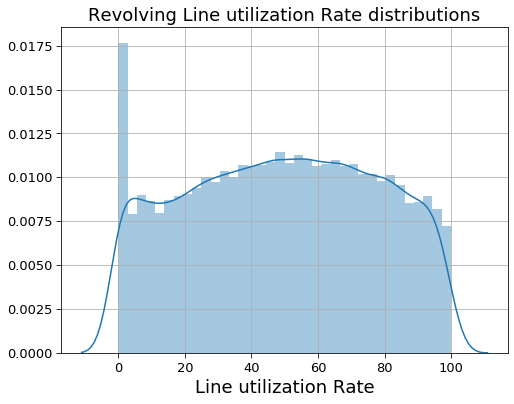

In [843]:
plt.figure(figsize=(8,6))
sns.distplot(final_data["revol_util"])
plt.title("Revolving Line utilization Rate distributions",fontsize=18)
plt.xlabel("Line utilization Rate",fontsize=18)
# plt.ylabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

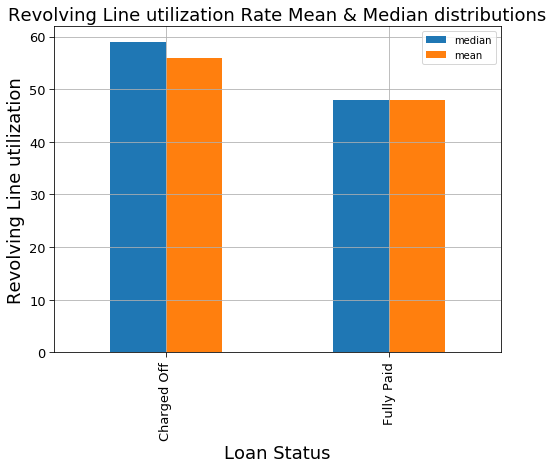

In [844]:
final_data.groupby(by="loan_status")["revol_util"].agg([np.median,np.mean]).plot.bar(figsize=[8,6])
plt.title("Revolving Line utilization Rate Mean & Median distributions",fontsize=18)
plt.xlabel("Loan Status",fontsize=18)
plt.ylabel("Revolving Line utilization",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `Mean and Median of Revolving line utilization for loan status Charged off are high.`

### `total_pymnt_inv`

In [845]:
final_data.groupby(by="loan_status")["total_pymnt_inv"].agg([np.median,np.mean])

,median,mean
loan_status,,
Charged Off,4509.445,6529.810862
Fully Paid,10100.150,12172.536140


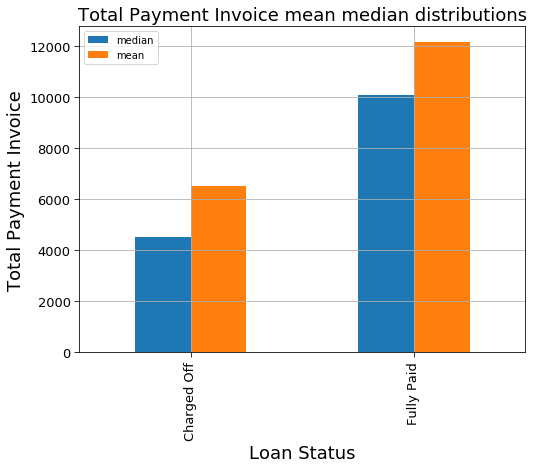

In [846]:
final_data.groupby(by="loan_status")["total_pymnt_inv"].agg([np.median,np.mean]).plot.bar(figsize=[8,6])
plt.title("Total Payment Invoice mean median distributions",fontsize=18)
plt.xlabel("Loan Status",fontsize=18)
plt.ylabel("Total Payment Invoice",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `Total Payment Invoice median for defauters are around low compare to non-defaulters.`

### `Total no of Accounts.`

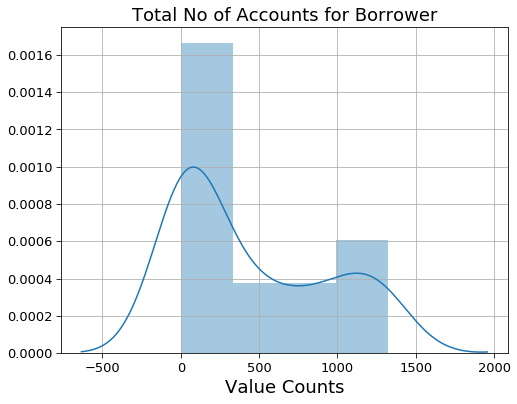

In [847]:
plt.figure(figsize=(8,6))
sns.distplot(final_data["total_acc"].value_counts())
plt.title("Total No of Accounts for Borrower",fontsize=18)
plt.xlabel("Value Counts",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

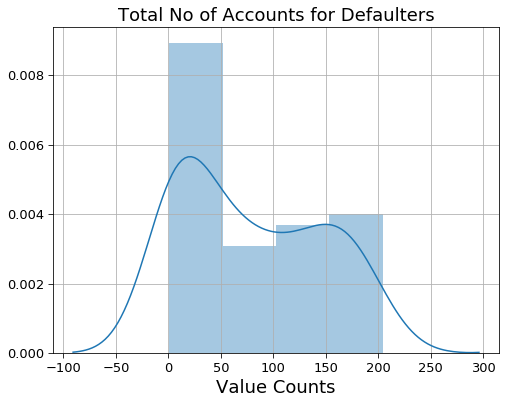

In [848]:
plt.figure(figsize=(8,6))
sns.distplot(final_data[(final_data["loan_status"]=="Charged Off")]["total_acc"].value_counts())
plt.title("Total No of Accounts for Defaulters",fontsize=18)
plt.xlabel("Value Counts",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

In [849]:
final_data.groupby(by="loan_status")["total_acc"].agg([np.mean,np.median])


,mean,median
loan_status,,
Charged Off,21.678797,20
Fully Paid,22.234261,21


### `Remaining outstanding principal for total amount funded.`

In [850]:
final_data["out_prncp"].describe()

count    36030.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64

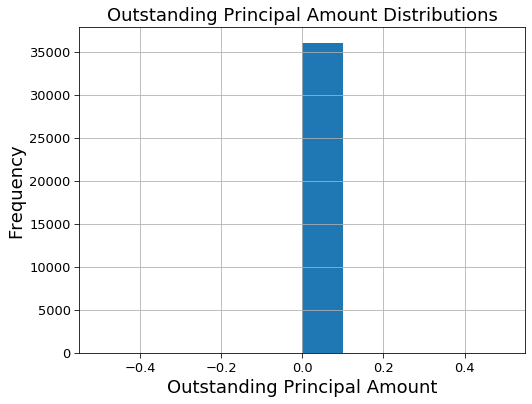

In [851]:
plt.figure(figsize=(8,6))
final_data["out_prncp"].plot.hist()
plt.title("Outstanding Principal Amount Distributions",fontsize=18)
plt.xlabel("Outstanding Principal Amount",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

### `total_rec_late_fee`

In [852]:
final_data["total_rec_late_fee"].describe()

count    36030.000000
mean         1.348048
std          7.266952
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

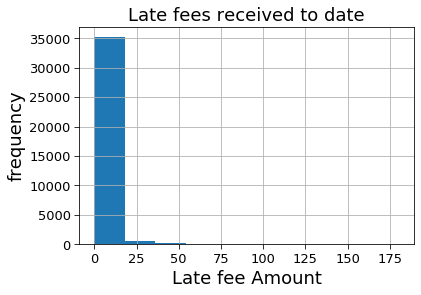

In [853]:
final_data["total_rec_late_fee"].plot.hist()
plt.title("Late fees received to date",fontsize=18)
plt.xlabel("Late fee Amount",fontsize=18)
plt.ylabel("frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

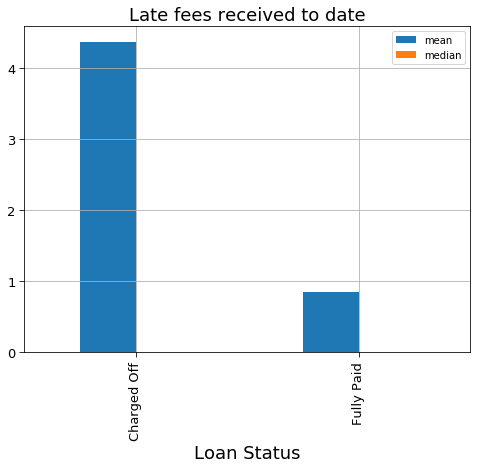

In [854]:
final_data.groupby(by="loan_status")["total_rec_late_fee"].agg([np.mean,np.median]).plot.bar(figsize=[8,6])
plt.title("Late fees received to date",fontsize=18)
plt.xlabel("Loan Status",fontsize=18)
# plt.ylabel("frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `Mean and median of Late fees received for defaulters are high.`

### `total_rec_int`

In [855]:
final_data["total_rec_int"].describe()

count    36030.000000
mean      2145.478476
std       2395.672828
min          6.220000
25%        661.492500
50%       1329.885000
75%       2709.245000
max      23563.680000
Name: total_rec_int, dtype: float64

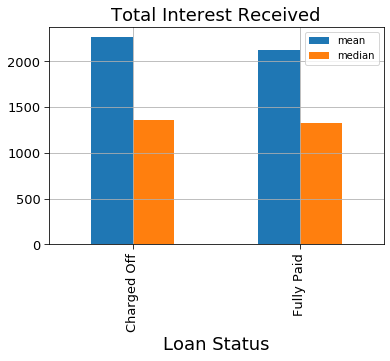

In [856]:
final_data.groupby(by="loan_status")["total_rec_int"].agg([np.mean,np.median]).plot.bar()
plt.title("Total Interest Received",fontsize=18)
plt.xlabel("Loan Status",fontsize=18)
# plt.ylabel("frequency",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

### Loan Amount vs Interest rate 

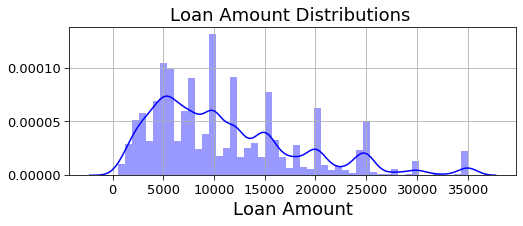

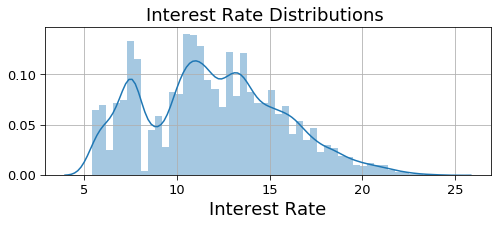

In [857]:
plt.figure(figsize=(8,6))
plt.subplot(212)
sns.distplot(final_data["loan_amnt"],color="blue")
plt.title("Loan Amount Distributions ",fontsize=18)
plt.xlabel("Loan Amount",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

plt.figure(figsize=(8,6))
plt.subplot(211)
sns.distplot(final_data["int_rate"])
plt.title("Interest Rate Distributions ",fontsize=18)
plt.xlabel("Interest Rate",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)




### `Loan status "Charged off"  vs Purpose`

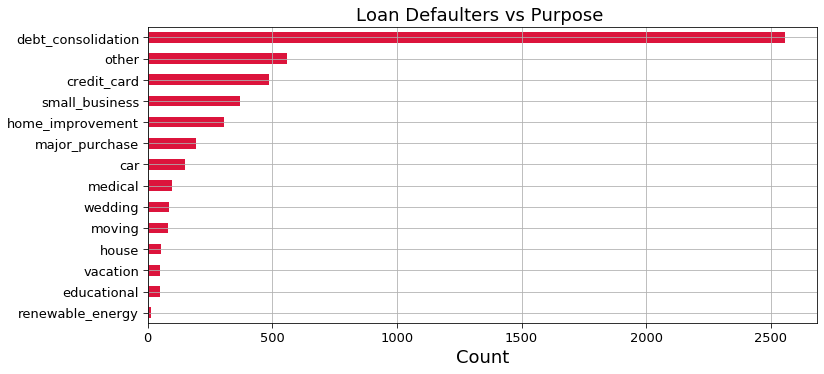

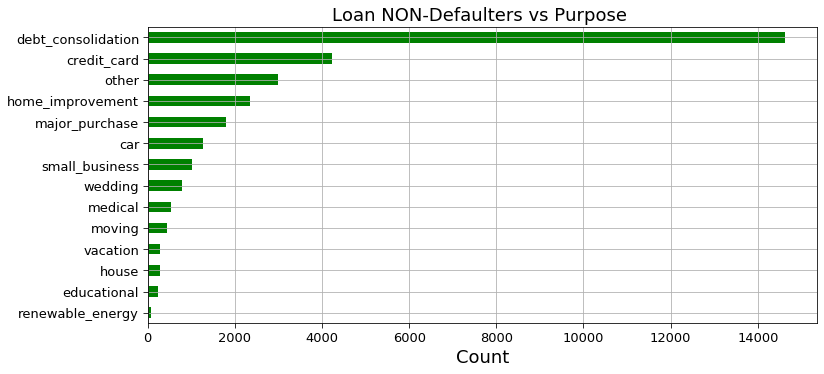

In [858]:
plt.figure(figsize=(12,12))
plt.subplot(211)
final_data[final_data["loan_status"]=="Charged Off"]["purpose"].value_counts().sort_values().plot.barh(color="crimson")
plt.title("Loan Defaulters vs Purpose ",fontsize=18)
plt.xlabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

plt.figure(figsize=(12,12))
plt.subplot(212)
final_data[~(final_data["loan_status"]=="Charged Off")]["purpose"].value_counts().sort_values().plot.barh(color="green")
plt.title("Loan NON-Defaulters vs Purpose ",fontsize=18)
plt.xlabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

### `Loan Status "Charged Off" vs Verification Status`

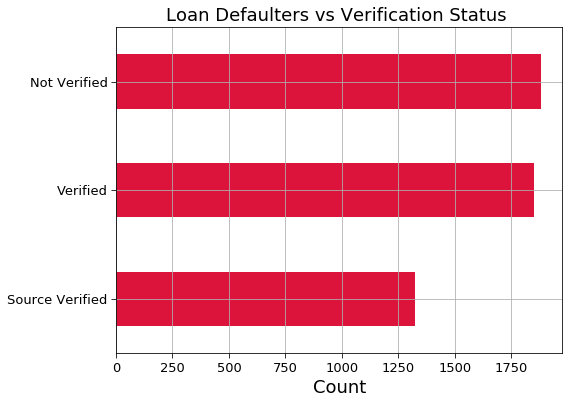

In [859]:
plt.figure(figsize=(8,6))
final_data[final_data["loan_status"]=="Charged Off"]["verification_status"].value_counts().sort_values().\
plot.barh(color="crimson")

plt.title("Loan Defaulters vs Verification Status ",fontsize=18)
plt.xlabel("Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)


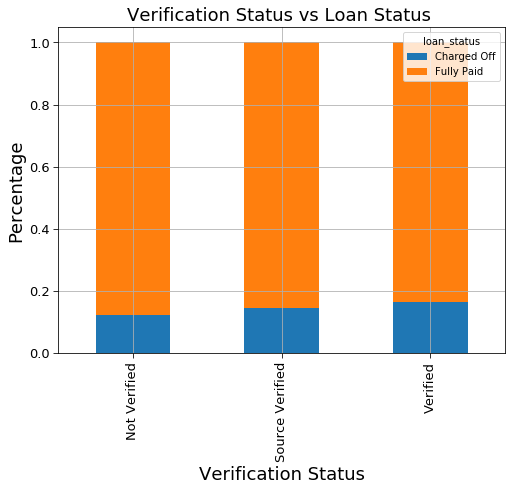

In [860]:
final_data.groupby(by="verification_status")["loan_status"].value_counts(normalize=True).\
unstack().plot.bar(stacked=True,figsize=[8,6])
plt.title("Verification Status vs Loan Status ",fontsize=18)
plt.xlabel("Verification Status",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

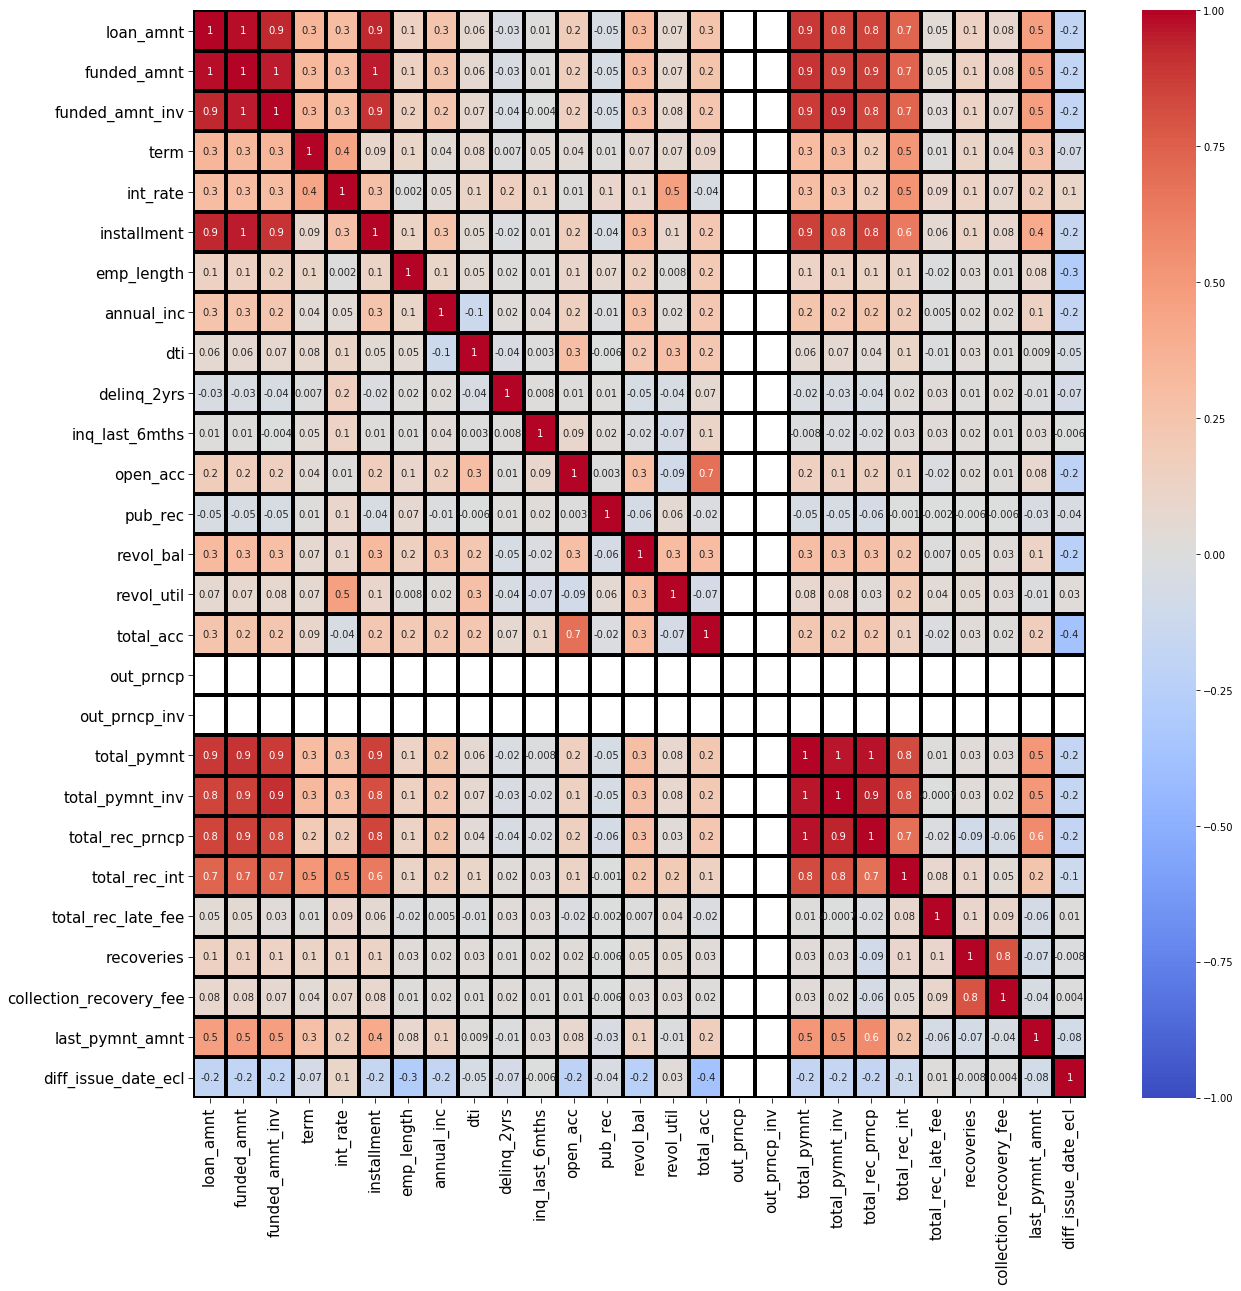

In [861]:
plt.figure(figsize=(20,20))
sns.heatmap(final_data.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black')
# plt.title("Verification Status vs Loan Status ",fontsize=18)
# plt.xlabel("Verification Status",fontsize=18)
# plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 15)
# plt.grid(0.3)

##  <span style='background :cyan' > Findings:- </span>
- `Loan Amount, Funded Amount and Funded Amount Invoice are highly positive correlated with each other`
- `Installment is highly postive correlated with Loan Amount, Funded Amount and Funded Amount Invoice.`
- `total_pymnt,total_pymnt_inv and total_rec_prncp ar again highly positive correlated with Loan Amount, Funded Amount and Funded Amount   Invoice.`
- `Installment is highly postive correlated with total_pymnt,total_pymnt_inv and total_rec_prncp.`
- `Total Account and Open account are also positively correlated.`

In [868]:

# sns.pairplot(final_data)


In [869]:
# from scipy.stats import chisquare

# df=df.apply(lambda x : pd.factorize(x)[0])+1

# pd.DataFrame([chisquare(df[x].values,f_exp=df.values.T,axis=1)[0] for x in df])

In [870]:
# sns.regplot(x="loan_status", y="loan_amnt",data=final_data)

In [871]:
from sklearn.preprocessing import LabelEncoder

final_data["Verification_Encoded"] = LabelEncoder().fit_transform(final_data.verification_status)
final_data["Verification_Encoded"] 

1        1
3        1
5        1
6        0
7        1
        ..
39710    0
39711    0
39712    0
39713    0
39716    0
Name: Verification_Encoded, Length: 36030, dtype: int32

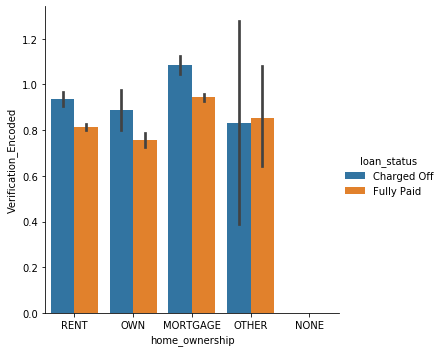

In [872]:
sns.catplot(x="home_ownership", y="Verification_Encoded", hue="loan_status", kind="bar", data=final_data)

###  Bivariate Analysis

In [670]:
final_data["term"]

1        60
3        36
4        60
5        36
6        60
         ..
39710    36
39711    36
39712    36
39713    36
39716    36
Name: term, Length: 37096, dtype: int64

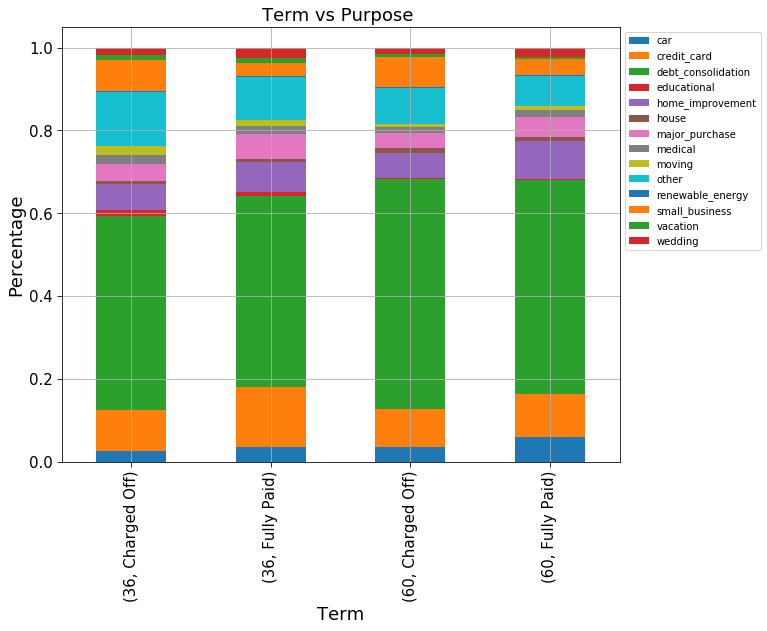

In [915]:
final_data.groupby(["term","loan_status"])["purpose"].value_counts(normalize=True).unstack().plot.bar(stacked=True,figsize=[10,8])
plt.title("Term vs Purpose ",fontsize=18)
plt.xlabel("Term",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 15)
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.grid(0.3)

In [882]:
final_data["term"] = final_data["term"].astype("category")

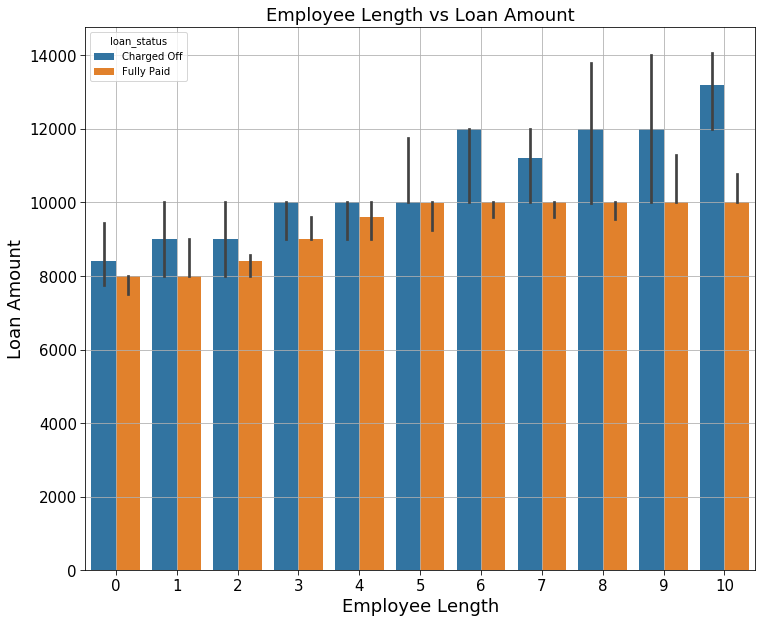

In [895]:
plt.figure(figsize=(12,10))
sns.barplot(x="emp_length",y="loan_amnt",hue="loan_status" ,data=final_data,estimator=np.median)
plt.title("Employee Length vs Loan Amount",fontsize=18)
plt.xlabel("Employee Length",fontsize=18)
plt.ylabel("Loan Amount",fontsize=18)
plt.tick_params(size=5,labelsize = 15)
plt.grid(0.3)

In [936]:
def get_crosstab(colum_name):
    crosstab = pd.crosstab(final_data[colum_name], final_data['loan_status'],margins=True)
    crosstab['Default_Rate'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [937]:
states = get_crosstab('addr_state')
states

loan_status,Charged Off,Fully Paid,All,Default_Rate
addr_state,,,,
AK,15,59,74,0.203
AL,47,357,404,0.116
AR,25,194,219,0.114
AZ,106,663,769,0.138
CA,999,5477,6476,0.154
CO,84,621,705,0.119
CT,80,584,664,0.120
DC,15,190,205,0.073
DE,11,96,107,0.103


In [939]:
purpose = get_crosstab('purpose')
purpose

loan_status,Charged Off,Fully Paid,All,Default_Rate
purpose,,,,
car,151,1260,1411,0.107
credit_card,487,4231,4718,0.103
debt_consolidation,2559,14634,17193,0.149
educational,48,246,294,0.163
home_improvement,305,2355,2660,0.115
house,53,282,335,0.158
major_purchase,194,1799,1993,0.097
medical,96,535,631,0.152
moving,82,450,532,0.154
